#**Proyecto Bedu: procesamiento y análisis de datos con Python.**
**Caso de estudio: Demanda de reservaciones de dos tipos de hotel**

Elaborado por: Perla Conchita Peña Campos

El sector hotelero es un elemento fundamental para la industria hotelera ya que cubre la necesidad de descanso y hospedaje, de acuerdo con (Gónzalez, 2019).

Euromonitor indica que las ventas totales del sector de alojamiento en Portugal alcanzaron los 4 mil 983 millones de euros en el 2018, del cual el 67% proviene de hoteles. Además Portugal ha sido de los países que ha recuperado pese a la pandemina originada por el COVID19.

La mayoría de los que integra este sector son microempresas con una participación del 65%, quedando las grandes empresas con un 9% de la oferta hotelera y el resto por la mediana empresa.

Sin embargo, pese a los esfuerzos de la industria, existen áreas de oportunidad ya que el consumidor de estos servicios es muy sensible al precio, el mercado es muy competitivo ya que las grandes empresas abarcan la mayoría de la demanda; y la fuerte competencia que Airbnb ejerce en el mercado. (Díaz, 2019)

Los hoteles para hacer frente deben mejorar sus procesos de gestión y dentro de ellos encontramos la cancelación de las reservaciones.

La cancelación de reservaciones es un comportamiento común en los consumidores, al igual que el cambio en sus reservaciones (como la duración de su estadía y el número de personas por reservación) y puede representar un problema para industria. (Nuno, 2019)

Con la finalidad de estudiar lo anterior y proponer una solución, en este proyecto se utiliza una base de datos llamada *Hotel booking demand datasets* la cual contiene información sobre hoteles de ciudad y tipo resort y la descripción de sus reservaciones.

Por lo tanto el objetivo del presente proyecto es obtener un modelo que ayude a predecir el comportamiento de la cancelaciones.

Para lograrlo se divide en dos secciones:
1. Procesamiento de datos (correspondientes al módulo 3 del programa).
2. Análisis de datos (correspondiente al módulo 4 del programa)

## Descripción del dataset

**Descripción del data set**

El data set contiene información de dos hoteles de Portugal, resort (H1) y de ciudad (H2). Cuenta con 31 variables que describen 40,060 observaciones para el de resort y 79,330 observaciones para el de ciudad (H2). Comprende información del 01 julio del 2015 al 31 de agosto del 2017. 
La información fue tomada del siguiente artículo:
[artículo](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

## Procesamiento de datos


---



### Objetivo y preguntas de investigación

El estudio se divide en dos etapaas: procesamiento y análisis de datos.

Los objetivos en la primera etapa del trabajo son:


1.   Realizar la importación del data set
2.   Limpiar el data set de valores nulos
3.   Realiazar el casting así como la creación de nuevas variables necesarias
4.   Resolver las siguientes preguntas de investigación:

*   ¿Cuál es la cantidad de menores alojada en cada hotel?
*   Para los hoteles resort ¿cuál es el mes con mayor número de reservaciones efectivamente realizadas?
*   Para los hoteles resort ¿Cuántas reservaciones no canceledas con menores de edad se hicieron por mes?
*   Independientemente del tipo de hotel, ¿cuál es el país de procedencia del que ser realiza el mayor número de reservaciones con menores de edad? ¿Cuántos menores comunmente se registran por reservación de dicho país?







### Importación

**Dataset y limpieza**

Importación de la base de datos e idenficar los valores incompletos


In [ ]:
#Importar las bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import plotly.express as px
from urllib.request import urlopen
import json
from numpy import mean

In [ ]:
#Conectar con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Descargar la base de datos
df = pd.read_csv('/content/drive/MyDrive/demo_day_3/hotel_bookings.csv', sep=',')
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [ ]:
#Rescatamos la información de nuestras variables, para detectar el tipo de variable así como valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              01/07/2015  
1              01/07/2015  
2              02/07/2015  
3              02/07/2015  
4              03/07/2015  

[5 rows x 32 columns]

In [ ]:
#Cantidad de datos faltantes
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Usando la función *info* se puede destacar de la base de datos:


1.   Cuenta con 20 variables númericas y 12 categóricas
2.   Las variables *children*, *country*, *agent*, *company* presentan valores nulos o faltantes




### Limpieza data set. Manejo de los valores nulos

**Variable agent**
Al analizar el documento adjunto a la base de datos se detecta que los valores nulos de las variables llamadas *agent*  corresponde a que el trámite fue hecho de manera personal, por lo que esos casos carecen de código. Por lo que para fines del proyecto se sustituirán por valor 0.

In [ ]:
#para modificaciones trabajaremos con el siguiente data frame
df_demo = df

In [ ]:
df_agent_null = df[df.agent.isnull()] #identicar los valores núlos de la variable agent del dataset

In [ ]:
#rellenar con valor cero
df_demo["agent"] = df["agent"].fillna(0)
df_demo["agent"].isna().sum()

0

**Variable country y company**
En el caso de country se cambió por la palabra *unknown* ya que desconocemos el dato. *company* es eliminada ya que contiene mas del 50% de datos nulos. 

In [ ]:
df_demo["country"] = df_demo["country"].fillna("UNKNOWN")
df_demo["country"].isna().sum()

0

In [ ]:
df_demo.drop("company", inplace= True, axis=1)

In [ ]:
df_demo.columns.values == "company"

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

**Variable children** los valores nulos se reemplazan con el promedio de la columna

In [ ]:
df_demo["children"] = df_demo["children"].fillna(df_demo["children"].median())
df_demo["children"].isna().sum()

0

In [ ]:
df_demo["children"].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
#Así queda nuestro dataset
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Nuevas columnas y casting de variables

La variable *reservation_status_date* esta en formato object y es necesario tranformarlo en fecha.

In [ ]:
df_demo["reservation_status_date"] = pd.to_datetime(df_demo["reservation_status_date"])
df_demo.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

La fecha de llegada de los huéspedes esta dividida en tres variables, por lo que se ha creado una nueva columna *arrival_date* donde se une esta información.
*   *arrival_date_year* (al ser una variable tipo object se convierte en srt para poder formar la fecha)
*   *arrival_date_month*
*   *arrival_date_day_of_month* (al ser una variable tipo object se convierte en srt para poder formar la fecha)




In [ ]:
df_demo["arrival_date"] = df_demo['arrival_date_day_of_month'].astype(str)+"/"+df_demo['arrival_date_month']+"/"+ df_demo["arrival_date_year"].astype(str)
df_demo["arrival_date"][0]

'1/July/2015'

In [ ]:
#Se tranforma la nueva columna en fecha
df_demo["arrival_date"] = pd.to_datetime(df_demo["arrival_date"])
df_demo["arrival_date"].dtypes
df_demo["arrival_date"][0]

Timestamp('2015-07-01 00:00:00')

Para el objetivo del estudio de conocer el comportamiento de reservación de adultos con niños se crea una nueva variable *kids* donde *children* y *babies* se totalicen.

In [ ]:
df_demo["kids"] = df_demo["children"] + df_demo["babies"]
#comprobamos que haya sido creada
df_demo_1 = pd.DataFrame(df_demo, columns=["children", "babies", "kids"])
df_demo_1.head()
#cast kids como int
df_demo["kids"] = df_demo["kids"].astype(int)

In [ ]:
#cast kids como int
df_demo["kids"] = df_demo["kids"].astype(int)
df_demo["kids"].dtypes

dtype('int64')

Se crea una nueva columna donde kids sea un dato booleano y lo podamos utilizar para hacer predicciones.

In [ ]:
def kids_bool (kids):
  if kids == 0:
    return 0
  else:
    return 1

df_demo["kids_bool"] = list(map(kids_bool,df_demo["kids"]))

El data set presenta el total de noches que utilizaron los huespédes separas por entre semana y fin de semana, por lo que se agrega una columna con el total de noches ocupadas.

*   *stays_in_weekend_nights*
*   *stays_in_week_nights*



In [ ]:
df_demo["total_nights"] = df_demo["stays_in_weekend_nights"] + df_demo["stays_in_week_nights"]
df_demo["total_nights"][2]

1

Generalmente en la industria hotelera, se separa los niños de los adultos ya que algunos cuentan con servicios gratuitos para menores. Sin embargo se agrega la columna total de personas para fines de análisis.


*   *adults*
*   *kids*



In [ ]:
df_demo["total_persons"] = df_demo["adults"] + df_demo["kids"]

### Merge y agrupaciones


**¿Cuál es la cantidad de menores que llegò a cada tipo de hotel?**

In [ ]:
df_no_canceled = df_demo[df_demo.is_canceled == False]

df_no_canceled.groupby("hotel")["kids"].sum()


hotel
City Hotel      4946
Resort Hotel    3527
Name: kids, dtype: int64

Detectamos que el tipo de hotel que mas menores recibió son de los de ciudad, con 4946.

**Visualizar los datos por hotel y cantidad de niños recibidos mensualmente**

In [ ]:
df_no_canceled.groupby(["hotel", "arrival_date_month"])["kids"].sum()

hotel         arrival_date_month
City Hotel    April                  481
              August                1092
              December               314
              February               354
              January                223
              July                   878
              June                   364
              March                  277
              May                    282
              November               112
              October                317
              September              252
Resort Hotel  April                  214
              August                 878
              December               211
              February               240
              January                122
              July                   740
              June                   257
              March                  187
              May                    229
              November               108
              October                174
              September 

**Para los hoteles resort ¿cuál es el mes con mayor número de reservaciones efectivamente realizadas?**

Para identificarlo como primer paso se crea un data frame que solo contenga los datos de hoteles tipo resort y cuya reservación no se haya cancelado. Después se agrupa por meses e identificados el mes con mayor reservación

In [ ]:
#df de hoteles resort con reservaciones no canceladas
df_resort = df_demo[df_demo.hotel == "Resort Hotel"]
df_resort_no_canceled = df_resort[df_resort.is_canceled == False]
df_resort_no_canceled

#agrupamos y ordenamos por meses
df_resort_no_canceled.groupby("arrival_date_month").size().sort_values(ascending=False)

arrival_date_month
August       3257
July         3137
October      2577
March        2573
April        2550
May          2535
February     2308
September    2102
June         2038
December     2017
November     1976
January      1868
dtype: int64

En los hoteles tipo resort el mes con mayor número de reservaciones es agosto, con 3527.

**¿Cuántas reservaciones no canceledas con menores de edad se hicieron por mes en hoteles tipo resort?**

In [ ]:
filtro_resort_no_canceled_kids = df_resort_no_canceled["kids"]!=0
df_resort_no_canceled[filtro_resort_no_canceled_kids].groupby("arrival_date_month")["kids"].agg(['mean', 'sum']).sort_values("sum", ascending = False)


mean  sum
arrival_date_month               
August              1.380503  878
July                1.420345  740
June                1.451977  257
February            1.395349  240
May                 1.396341  229
April               1.417219  214
December            1.327044  211
March               1.375000  187
October             1.338462  174
September           1.403361  167
January             1.402299  122
November            1.350000  108

El mes con mayor cantidad de menores es agosto con 878 menores.

**Independientemente del tipo de hotel, ¿cuál es el país de procedencia del que ser realizó el mayor número de llegadas con menores de edad? ¿Cuántos menores comúnmente se registran por reservación de dicho país?**



In [ ]:
#Primero identificamos el pais con mayor número de reservaciones de menores de edad
df_no_canceled = df_demo[df_demo.is_canceled == False]
df_no_canceled.groupby("country")["kids"].sum().sort_values(ascending= False).head(3)

country
PRT    2327
ESP    1014
FRA     946
Name: kids, dtype: int64

In [ ]:
## Otra forma de hacerlo aplicando filtro 
filtro_df_no_canceled_kids = df_no_canceled["kids"]!=0
df_no_canceled[filtro_df_no_canceled_kids].groupby("country")["kids"].sum().sort_values(ascending= False).head(3)


country
PRT    2327
ESP    1014
FRA     946
Name: kids, dtype: int64

In [ ]:
 #Ya que hemos idenfiticado el país, lo localizamos en nuestro data frame
 df_2 = pd.DataFrame(df_no_canceled, columns=["country", "kids"])
 filtro_prt = df_2["country"]== "PRT"
 filtro_kids = df_2["kids"]!=0
 df_2[filtro_prt & filtro_kids].mode()

country  kids
0     PRT     1

In [ ]:
##Otra forma de hacerlo obtienendo datos de los 3 países con mayor número de reservaciones de menores
df_no_canceled[filtro_df_no_canceled_kids].groupby("country")["kids"].agg(['mean', 'sum']).sort_values("sum", ascending = False).head(10)


mean   sum
country                
PRT      1.370436  2327
ESP      1.373984  1014
FRA      1.383041   946
GBR      1.446458   878
DEU      1.326007   362
ITA      1.336449   286
USA      1.558442   240
BRA      1.338983   237
BEL      1.473684   224
IRL      1.389262   207

In [ ]:
df_demo[["country", "children"]]

country  children
0          PRT       0.0
1          PRT       0.0
2          GBR       0.0
3          GBR       0.0
4          GBR       0.0
...        ...       ...
119385     BEL       0.0
119386     FRA       0.0
119387     DEU       0.0
119388     GBR       0.0
119389     DEU       0.0

[119390 rows x 2 columns]

In [ ]:
df_demo.shape

(119390, 36)

La mayoría de los menores proceden de Portugal (donde se ubican los hoteles). Como país extranjero encontramos que proceden de España, siendo un total de 1014 menores recibidos en las instalaciones.

### Cierre procesamiento de datos 

En el siguiente apartado, visualizaremos información del dataset que nos ayudará a comprender el comportamiento de las reservaciones en estos dos tipos de hoteles

##Análisis de datos


---



### Problema de investigación



### Estimados de locación y variabilidad


De acuerdo con el trabajo realizado en R, se identificaron las variables que tienen relación con nuestra pregunta de investigación las cuales son:



En este apartado se calculará:


*   Promedio
*   Mediana
*   Media truncada
*   Desviación estándar
*   Estadísiticos de orden
*   Rango
*   Percentiles

**Descripción del data set**


In [ ]:
df_demo.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119390.000000  119390.000000      119390.000000   
mean        0.103886       0.007949           0.031912   
std         0.398555       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent  days_in_waiting_list            adr  \
count    119390.000000  119390.000000         119390.000000  119390.000000   
mean          0.221124      74.828319              2.321149     101.831122   
std           0.652306     107.141953             17.594721      50.535790   
min           0.000000       0.000000              0.000000      -6.380000   
25%           0.000000       7.000000              0.000000      69.290000   
50%           0.000000       9.000000              0.000000      94.575000   
75%           0.000000     152.000000              0.000000     126.000000   
max          21.000000     535.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                119390.000000              119390.000000  
mean                      0.062518                   0.571363  
std                       0.245291                   0.792798  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0

In [ ]:
#Se identifican las variables que serán utilizadas
df_demo[["lead_time", "adults", "kids", "total_of_special_requests"]].describe()

KeyError: ignored

Se indentifica que las variables que contienen valores máximos mas allá de lo esperado es:
1. Lead time
2. arrival_date_week_number tiene el dato 53 y no es posible ya que el año solo tiene 52 semanas.
3. kids tiene valor máximo de 10, es necesario revisar a que se debe un número tan alto.
4. adr tiene un valor atípico, un precio demasiado alto así como un precio que es menor a 0

### Valores atípicos (Outliers)



Una vez que se indentificó a través de los estimados de locación nuestros valores atípicos, en este apartado se presenta su visualización a través de boxplot y como fueron eliminados.

In [ ]:
#Creamos la database para eliminar los outliers
df_hotel = df_demo.copy()

**Variable tiempo de llegada (lead_time)**




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


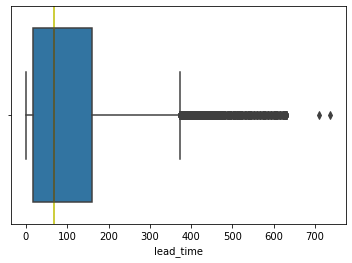

In [ ]:
#Visualizamos como se comporta la variable lead_time
sns.boxplot(df_hotel["lead_time"])
plt.axvline(df_hotel["lead_time"].median(), c="y");

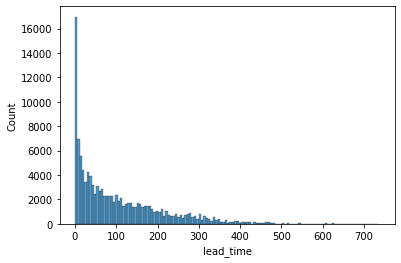

In [ ]:
sns.histplot(df_hotel["lead_time"])

Utilizando la curtosis y la simetría para describir nuestra variable de tiempo de llegada, encontramos que la distribución tiende a la derecha y que sus datos son muy dispersos. Sin embargo aparecen datos mayores a nuestro máximo cuantíl (605) que se consideran outliers. 

In [ ]:
from scipy.stats import skew, kurtosis

print(f'Curtosis: {kurtosis(df_hotel["lead_time"])}')
print(f'Asimetría: {skew(df_hotel["lead_time"])}')

Curtosis: 1.6963275478254607
Asimetría: 1.3465329547937892


Una vez que indentificamos los valores es momento de eliminarlos de nuestro dataset

In [ ]:
from scipy.stats import iqr
iqr =  iqr(df_hotel["lead_time"])
filtro_inferior = df_hotel['lead_time'] > df_hotel['lead_time'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_hotel['lead_time'] < df_hotel['lead_time'].quantile(0.75) + (iqr * 1.5)
df_hotel = df_hotel[filtro_inferior & filtro_superior]

In [ ]:
df_hotel.shape

(116356, 31)

Revisamos como queda nuestro boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


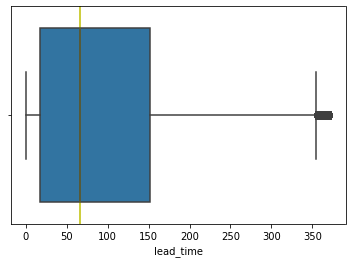

In [ ]:
sns.boxplot(df_hotel["lead_time"])
plt.axvline(df_hotel["lead_time"].median(), c="y");

In [ ]:
sns.displot(df_hotel["lead_time"], kde=True);

Verificamos nuestros valores de locación para la variable tiempo de espera

In [ ]:
print(f'La media era de {df_demo["lead_time"].mean()} y ahora es de {df_hotel["lead_time"].mean()}'),
print(f'la mediana era de {df_demo["lead_time"].median()} y ahora es de {df_hotel["lead_time"].median()}'),
print(f'la desviación estándar era de {df_demo["lead_time"].std()} y ahora es de {df_hotel["lead_time"].std()}')

**Variable precio promedio por dia (adr)** 

In [ ]:
#Visualizamos nuestra variable adr
sns.boxplot(df_hotel["adr"])
plt.axvline(df_hotel["adr"].median(), c="y");

Se puede apreciar que existe un dato mayor a 5000 y se encuentra aislado, así que en este caso se utiliza un cuantil más pequeño para eliminarlo.

In [ ]:
#Filas con los valores máximo y mínimo de adr
min_valor, max_valor = df_hotel.adr.quantile([0.001, (0.999)])
min_valor, max_valor

In [ ]:
#Ajustamos nuestro dataset eliminando ese valor atípico
df_hotel = df_hotel[(df_hotel.adr<max_valor) & (df_hotel.adr>min_valor)]
df_hotel.shape

In [ ]:
#comprobamos el tamaño de nuestro data set
df_hotel.shape

In [ ]:
#comprobamos el valor máximo
df_hotel["adr"].max()

Visualizamos el resultado al eliminar el valor atípico.

In [ ]:
sns.boxplot(df_hotel["adr"])
plt.axvline(df_hotel["adr"].median(), c="y");

In [ ]:
df_hotel["adr"].max()

Verificamos nuestros valores de locación para la variable precio promedio por día (adr)

In [ ]:
print(f'La media era de {df_demo["adr"].mean()} y ahora es de {df_hotel["adr"].mean()}'),
print(f'la mediana era de {df_demo["adr"].median()} y ahora es de {df_hotel["adr"].median()}'),
print(f'la desviación estándar era de {df_demo["adr"].std()} y ahora es de {df_hotel["adr"].std()}')

**Variable niños (kids)**

In [ ]:
#Visualizamos la variable kids
sns.boxplot(df_hotel["kids"])
plt.axvline(df_hotel["kids"].median(), c="y");

Dos valores sobresalen como atípicos. Al carecer de información que explique la razón de estos datos, identificamos cuantas filas contienen esos datos:

In [ ]:
df_hotel[df_hotel.kids > 4]

Como podemos ver las filas que tienen mas de 4 niños van acompañadas de un o dos adultos máximo. Se sugiere verificar si fue un caso excepcional, pero para nuestros fines es muy probable que se trate de outliers así que los eliminaremos

In [ ]:
df_hotel = df_hotel[(df_hotel.kids < 4)]


In [ ]:
#Visualizamos nuestra variable sin valores atípicos
sns.boxplot(df_hotel["kids"])
plt.axvline(df_hotel["kids"].median(), c="y");

In [ ]:
#Utilizamos la herramienta histograma para visualizar la variable kids
fig = px.histogram(df_hotel, x='kids');
fig

In [ ]:
#Verificamos el tamaño de nuestro dataset
df_hotel.shape

In [ ]:
print(f'La media era de {df_demo["kids"].mean()} y ahora es de {df_hotel["kids"].mean()}'),
print(f'la mediana era de {df_demo["kids"].median()} y ahora es de {df_hotel["kids"].median()}'),
print(f'la desviación estándar era de {df_demo["kids"].std()} y ahora es de {df_hotel["kids"].std()}')

Con las variables limpias de valores atípicos es momento de pasar a su análisis.

### Filtros del dataset

El dataset contiene información sobre las reservaciones que han sido y no canceladas. Separar la información en dichos dos puntos facilitará el estudio del mismo. 
En este apartado se presenta los dataset con los filtros mencionados.

In [ ]:
#Dataset con las reservaciones canceladas
df_canceled = df_hotel[(df_hotel.is_canceled == True)]
df_canceled.shape

(41947, 36)

In [ ]:
#Dataset con las reservaciones no canceladas
df_no_canceled = df_hotel[(df_hotel.is_canceled == False)]
df_no_canceled.shape

(72347, 36)

### Distribuciones del dataset y visualización de datos avanzada
*Incluye crosstab*

En el dataset encontramos información sobre dos tipos de hoteles, la cancelación de sus reservaciones así como otros datos importantes que describen dicha reservación.

En este apartado se analizó la información en cuatro categorías principales:


1.   *Análisis general sobre el comportamiento hotelero*
2.   *Análisis sobre los hoteles* 
3.   *Análisis de los canales de distribución*
4.   *Análisis sobre las cancelaciones*

Para lograrlo se utilizaron herramientas de visualización de datos básicos y avanzada.



#### Análisis general sobre el comportamiento hotelero 

El objetivo es conocer información relacionada con las reservaciones, la cual nos ayude a comprender el comportamiento del consumidor.

Cuestiones a resolver son:


1.   ¿De cuál país provienen las reservaciones realizadas?
2.   ¿Cuántas de las reservaciones provienen de clientes que ya han estado en ese mismo hotel?
3.   Demanda: ¿Cuál es el comportamiento de las reservaciones por mes?
4.   Oferta: ¿Cuál es el precio promedio por noche en los diferentes meses?




> ¿De cuál país provienen las reservaciones realizadas?

In [ ]:
#Calcular del total de reservaciones, el porcentaje que corresponde a cada país
counts_percentage = (df_hotel["country"].value_counts())*100/df_hotel["country"].value_counts().sum()
counts_percentage
percentage = counts_percentage.head(10)
percentage

PRT    39.282902
GBR    10.255132
FRA     9.032845
ESP     7.400213
DEU     5.952193
ITA     3.279262
IRL     2.943287
BEL     2.036852
BRA     1.934485
NLD     1.835617
Name: country, dtype: float64

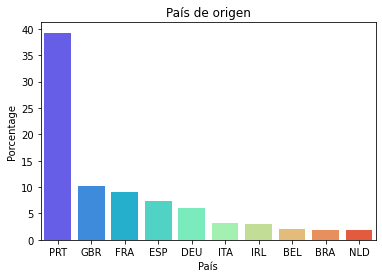

In [ ]:
#Graficamos los paises y su porcentaje de participación en las reservaciones
ax= sns.barplot(x=percentage.index, y=percentage, palette='rainbow')
ax.set_title("País de origen")
ax.set(xlabel="País")
ax.set(ylabel="Porcentage");

El 39% de los clientes proviene del mismo país de origen del data set (Portugal), seguido por un 10% del Reino Unido. En tercer lugar están los visitantes provenientes de Francia con 9%.

Otra forma de visualizarlo de manera dinámica es a través de un mapa, en el cual usaremos el total de reservaciones.

In [ ]:
#Identificamos el total de reservaciones por país de procedencia
df_country = df_hotel["country"].value_counts().to_frame().reset_index()
df_country.rename(columns = {"index":"country", "country":"total"}, inplace = True)
df_country

country  total
0       PRT  44898
1       GBR  11721
2       FRA  10324
3       ESP   8458
4       DEU   6803
..      ...    ...
173     KNA      1
174     HND      1
175     BWA      1
176     VGB      1
177     NAM      1

[178 rows x 2 columns]

In [ ]:
#Elaboramos el mapa con los totales. 
mapa =px.choropleth(df_country,
                 locations="country",
                 color="total",
                 hover_name="country",
                 color_continuous_scale=px.colors.sequential.Viridis,
                             title="Reservaciones por país")
mapa.show()



> ¿Cuántos clientes visitan el mismo hotel por más de una ocasión?



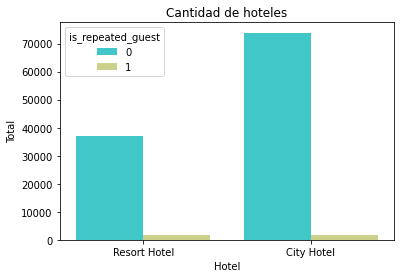

In [ ]:
#Identificamos si el cliente es de segunda ocasión y el tipo de hotel al que acudieron.
ax = sns.countplot(x="hotel", hue="is_repeated_guest", data=df_hotel, palette='rainbow')
ax.set_title("Cantidad de hoteles")
ax.set(xlabel="Hotel")
ax.set(ylabel="Total");

Los clientes que visitan por mas de una ocasión el mismo hotel son muy pocos tanto para hoteles de ciudad y tipo resort. Ahora veremos el porcentaje que representan de toda la información

In [ ]:
#Identificamos el total de reservaciones existentes tanto para clientes de segunda ocasión como los que no
total_reservas = df_hotel["is_repeated_guest"].value_counts()
total_reservas = pd.DataFrame(total_reservas)
total_reservas

is_repeated_guest
0             111024
1               3270

In [ ]:
#Obtenemos el porcentaje que representa cada uno
retorno = total_reservas*100 / total_reservas.sum()
retorno

is_repeated_guest
0          97.138957
1           2.861043

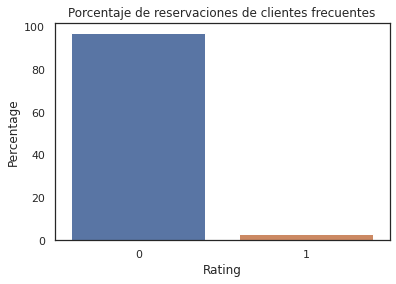

In [ ]:
#Visuailzamos la información 
ax = sns.barplot(x=total_reservas.index, y=retorno);
ax.set_title("Porcentaje de reservaciones de clientes frecuentes")
ax.set(xlabel="Rating")
ax.set(ylabel="Percentage");

El 97% de los clientes registrados en el periodo de tres año fue de primera ocasión. Únicamente el 3% ya había visitado el mismo hotel. Esta información puede dar pie a identificar las razones o incluso compararlo con el comportamiento del turismo que recibe Portugal y detectar si es comportamiento del mercado turístico del país.

En la primera gráfica que obtuvimos el total de clientes que ya estaban registrados en la base de datos de hotel, sin embargo es difícil apreciar en cuál hotel encontramos dicho comportamiento con mayor frecuencia, por lo que ahora lo veremos a través de porcentajes.

In [ ]:
#Total de clientes que regresaron al mismo hotel clasificado por tipo
repeat_client = df_hotel[df_hotel["is_repeated_guest"]==1]
repeat = repeat_client.groupby("hotel")
df_repeated = pd.DataFrame(repeat.size()).rename(columns = {0:"total_repeated_guest"})
df_repeated

total_repeated_guest
hotel                             
City Hotel                    1633
Resort Hotel                  1637

In [ ]:
#total de reservaciones realizadas por tipo de hotel
total_hotel = df_hotel.groupby("hotel").size()
total_hotel = pd.DataFrame(total_hotel).rename(columns = {0:"total_reservations"})
total_hotel

total_reservations
hotel                           
City Hotel                 75511
Resort Hotel               38783

In [ ]:
#Unimos la información de las dos tablas
reservations_total = pd.concat([df_repeated, total_hotel], axis=1)
reservations_total

total_repeated_guest  total_reservations
hotel                                                 
City Hotel                    1633               75511
Resort Hotel                  1637               38783

In [ ]:
#Calculamos el porcentaje de clientes que regresaron al mismo hotel
reservations_total["repeated_customer_%"] = reservations_total["total_repeated_guest"]/reservations_total["total_reservations"]*100
reservations_total

total_repeated_guest  total_reservations  repeated_customer_%
hotel                                                                      
City Hotel                    1633               75511             2.162599
Resort Hotel                  1637               38783             4.220922

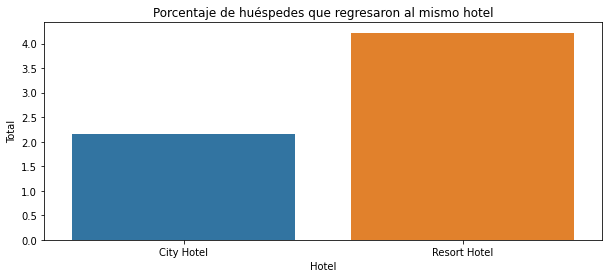

In [ ]:
#Graficamos la información
plt.figure(figsize=(10,4))
ax= sns.barplot(x=reservations_total.index, y = reservations_total["repeated_customer_%"])
ax.set_title("Porcentaje de huéspedes que regresaron al mismo hotel")
ax.set(xlabel="Hotel")
ax.set(ylabel="Total");

De las reservaciones realizadas en los hoteles de ciudad, solo el 2% ya había acudido previamente a ese hotel. Mientras que en los hoteles tipo resort el mismo comportamiento lo encontramos en un 4% de las reservaciones hechas. Aunque los porcentajes son pequeños, se destaca que el comportamiento se presenta con el doble de frecuencia en los hoteles tipo resort.

Una vez identificados los clientes que regresan extraemos información valiosa del segmento. Vemos que los que regresan a los hoteles de ciudad pagan en promedio 79 la noche, reservan con 43 días de anticipación y se quedan 2 noches.

In [ ]:
repeat_client_precio = repeat_client.groupby("hotel")["adr", "lead_time", "total_nights", "kids", "total_of_special_requests"].mean().reset_index()
repeat_client_precio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



hotel        adr  lead_time  total_nights      kids  \
0    City Hotel  79.929639  43.674832      1.942437  0.024495   
1  Resort Hotel  69.537282  26.295052      2.310935  0.042150   

   total_of_special_requests  
0                   0.551133  
1                   0.633476



> ¿Cuántas reservaciones se hacen por mes?



In [ ]:
#Ordenamos los meses de acuerdo al calendario
meses_2= pd.CategoricalDtype(categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
meses_2

CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December'],
, ordered=True)

In [ ]:
#Creamos una nueva base de datos para realizar las modificaciones de tiempo
df_hotel_month = df_hotel.copy()
df_hotel_month["arrival_date_month"] = df_hotel_month["arrival_date_month"].astype(meses_2)


In [ ]:
#Identificamos el total de reservaciones por mes
months = df_hotel_month.groupby("arrival_date_month")["arrival_date_month"].count()
months

arrival_date_month
January       5732
February      7852
March         9495
April        10856
May          11286
June         10636
July         11948
August       13273
September     9973
October      10330
November      6524
December      6389
Name: arrival_date_month, dtype: int64

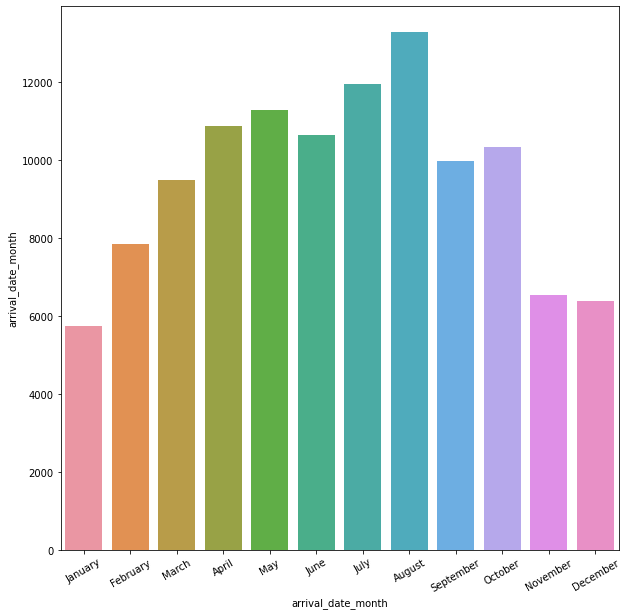

In [ ]:
#Visualizamos la información
plt.figure(figsize=(10,10))
ax= sns.barplot(x=months.index, y = months)
ax = plt.xticks(rotation=30);


El mes con mayor número de reservaciones es agosto, seguido por julio. Este comportamiento es el esperado por temporada vacacional dentro de la industria del turismo.

Una vez identificados los meses con mayor demanda, pasamos a conocer el precio promedio que paga el cliente por noche mensualmente.

In [ ]:
#Identificamos el precio promedio por noche de cada mes
df_adr = df_hotel_month.groupby(["hotel", "is_canceled", "arrival_date_month"])["adr"].mean().reset_index()
df_adr.head()

hotel  is_canceled arrival_date_month         adr
0  City Hotel            0            January   84.369015
1  City Hotel            0           February   88.345530
2  City Hotel            0              March   92.046924
3  City Hotel            0              April  113.468812
4  City Hotel            0                May  123.103640

<Figure size 2880x2880 with 0 Axes>

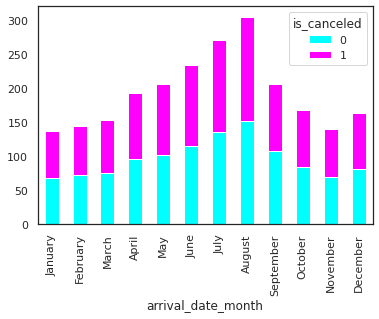

In [ ]:
#visualizamos la información
fig = plt.figure(figsize=(40, 40))

ax= (df_adr.groupby(["arrival_date_month", "is_canceled"])["adr"].mean().unstack(1).plot(stacked=True, kind="bar", colormap="cool"))


El precio promedio por noche que paga el cliente de las reservaciones no canceldas es mayor en agosto, siendo de 151 para las reservaciones no canceladas.
El precio promedio por noche por hotel en agosto de las reservaciones no canceladas es de 181 en los hoteles resort y 120 para los de ciudad

#### Análisis sobre los hoteles

En este apartado extraemos información sobre los dos tipos de hoteles: tipo resort y de ciudad.

Se resuelve:


1.   ¿Cuántas reservaciones se hicieron por cada tipo de hotel?
2.   ¿Cuál año fue el que tuvo mayor número de reservaciones en cada tipo de hotel?
3.   ¿Cuál es el precio promedio por habitación en cada mes por tipo de hotel?
4.   ¿Cuál canal de distribución vende al precio más alto para cada tipo de hotel?
5.   ¿Cómo se comporta la reservación de menores en cada tipo de hotel?
6.   ¿Cuántos ingresos generó cada tipo de hotel por año y cuánto fue el costo de la oportunidad por cancelaciones?



> ¿Cuántas reservaciones se hicieron por cada tipo de hotel?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



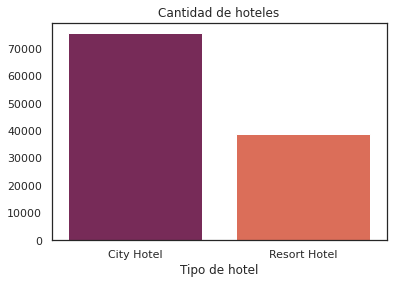

In [ ]:
sns.set(style="white")
x= df_hotel.groupby("hotel")["hotel"].count()
ax = sns.barplot(x.index, x, palette="rocket")
ax.set_title("Cantidad de hoteles")
ax.set(xlabel="Tipo de hotel")
ax.set(ylabel="");

Dentro del dataset la mayor parte de los datos son de hoteles de ciudad, en total 75,511 observaciones y de ciudad 38,783 datos.

> ¿Cuál año fue el que tuvo mayor número de reservaciones en cada tipo de hotel?

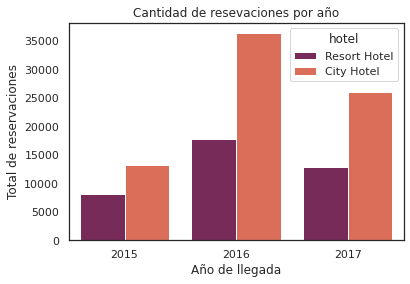

In [ ]:
ax = sns.countplot(x="arrival_date_year", hue="hotel", data=df_hotel, palette="rocket")
ax.set_title("Cantidad de resevaciones por año")
ax.set(xlabel="Año de llegada")
ax.set(ylabel="Total de reservaciones");

El año en que mas reservaciones se hicieron fue en el 2016 para ambos hoteles.

> ¿Cuál es el precio promedio por habitación en cada mes por tipo de hotel?

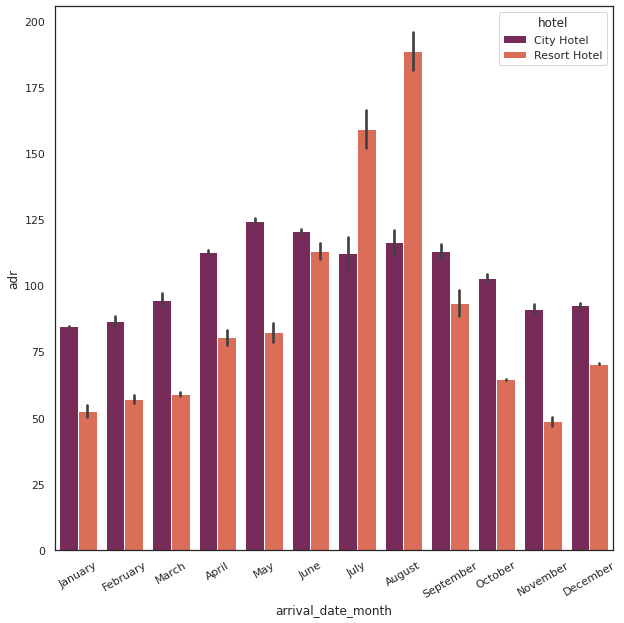

In [ ]:
plt.figure(figsize=(10,10))
ax= sns.barplot(x="arrival_date_month", y ="adr", hue= "hotel", data = df_adr, palette="rocket")
ax = plt.xticks(rotation=30);

Los hoteles resort aumentan su precio en el mes de agosto, llegando a 188 y para los de ciudad el mes de mayo con un precio promedio de 124.

> ¿Cuál es el mercado que paga precio promedio más alto para cada tipo de hotel?

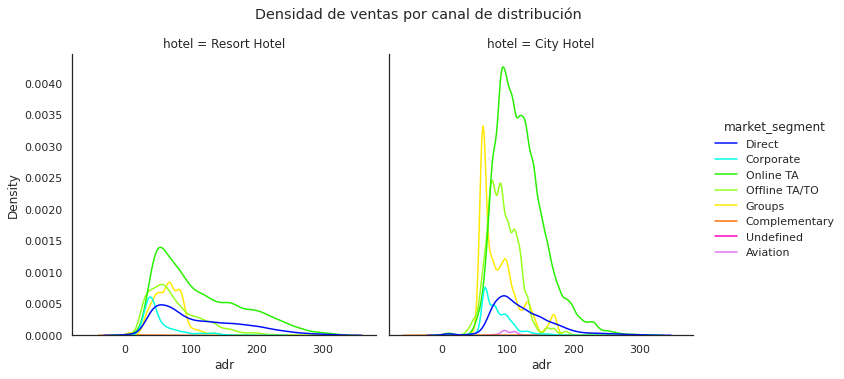

In [ ]:
ax= sns.displot(data=df_hotel, x='adr', hue='market_segment', kind='kde', col="hotel", palette="gist_ncar")
ax.fig.suptitle('Densidad de ventas por canal de distribución', y=1.05);

De acuerdo al diagrama de densidad los precios más alto son pagados por el mercado online.

> ¿Cómo se comporta la reservación de menores en cada tipo de hotel?


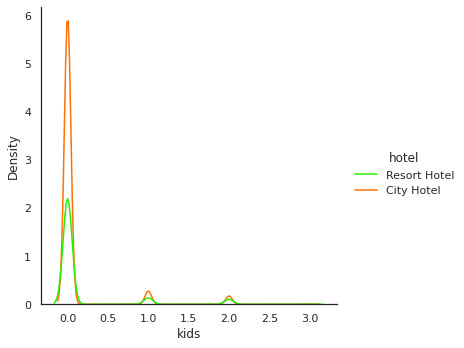

In [ ]:
sns.displot(data=df_hotel, x='kids', hue='hotel', kind='kde', palette="gist_ncar")
ax.fig.suptitle('Densidad de reservaciones de niños');

Los hoteles de ciudad tienen más reservaciones sin menores de edad.

> ¿Cuántos ingresos generó cada tipo de hotel por año y cuánto fue el costo de la oportunidad por cancelaciones? ¿Cuál fue el hotel qué mas ingresos generó y qué año?

In [ ]:
df_hotel["count"] = 1

In [ ]:
fig = px.treemap(df_hotel, path=["arrival_date_year", "hotel", "is_canceled"], values="adr")
fig

Los hoteles de ciudad fueron los que generaron más ingresos, siendo el 2016 el año más fuerte, con 1,506,441.

#### Análisis sobre los canales de distribución

Es momento de conocer el comportamiento de los canales por los que se hicieron las reservaciones.

Las preguntas que se analizan:
 
1.   ¿Cuál es canal en el que se reservó el mayor número de personas?
2.   ¿Cuál es el canal que mas ingresos generó por reservaciones no canceladas?
3.    ¿Cuál es el precio promedio por noche para cada hotel reservado por cada canal de distribución?

> ¿Cuál es canal en el que se reservó el mayor número de personas?

In [ ]:
fig = px.treemap(df_hotel, path=["distribution_channel", "hotel", "is_canceled"], values="total_persons")
fig

El mayor número de personas a las que se les reservó habitación fue a través de TA/TO que son las agencias de viajes y los operadores de tours.

> ¿Cuál es el canal que mas ingresos generó por reservaciones no canceladas?


In [ ]:
#calculamos la venta total (pago)
df_ingresos = df_no_canceled.copy()
df_ingresos["venta_total"] = df_ingresos["adr"] * df_ingresos["total_nights"]

In [ ]:
#visualizamos la información
fig = px.treemap(df_ingresos, path=["distribution_channel", "hotel"], values="venta_total")
fig

El canal que mas ingresos generó por reservaciones no canceladas fue TA/TO, que son las agencias de viajes y operadores turísticos. El total es de 20,754,786.

> ¿Cuáles son los totales de reservaciones por año de cada canal?

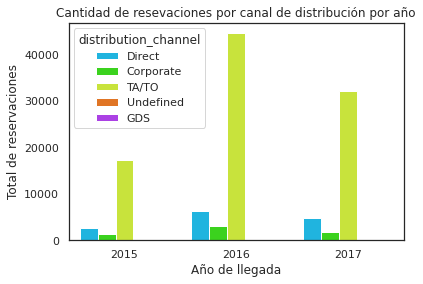

In [ ]:
ax = sns.countplot(x="arrival_date_year", hue="distribution_channel", data=df_hotel, palette="gist_ncar" )
ax.set_title("Cantidad de resevaciones por canal de distribución por año")
ax.set(xlabel="Año de llegada")
ax.set(ylabel="Total de reservaciones");

En el plot podemos observar los tres canales con mayor número de reservaciones destacando que en el 2016 la mayoría fueron realizadas por TA/TO

> ¿Cuál es el precio promedio por noche para cada hotel reservado por cada canal de distribución?



<Figure size 3600x4320 with 0 Axes>

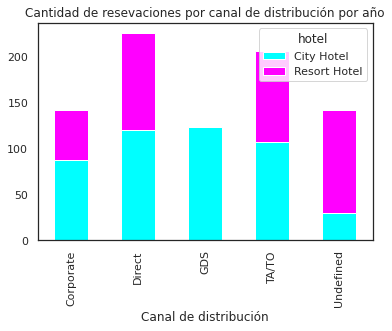

In [ ]:
fig = plt.figure(figsize=(50, 60))

ax= (df_hotel.groupby(["distribution_channel", "hotel"])["adr"].mean().unstack(1).plot(stacked=True, kind="bar", colormap="cool"))
ax.set_title("Cantidad de resevaciones por canal de distribución por año", y=1)
ax.set(xlabel="Canal de distribución");


El precio más alto promedio por reservación fue a través del canal directo.

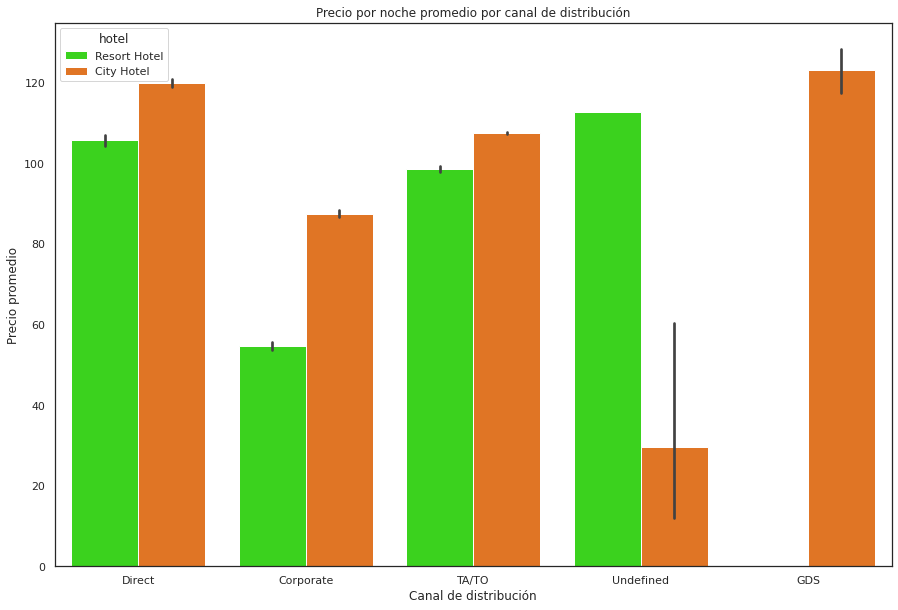

In [ ]:
#visualizamos la información en un barplot
plt.figure(figsize=(15,10))
ax= sns.barplot(x=df_hotel["distribution_channel"], y =df_hotel["adr"], hue= df_hotel["hotel"], estimator=mean, palette="gist_ncar")
ax.set_title("Precio por noche promedio por canal de distribución", y=1)
ax.set(xlabel="Canal de distribución")
ax.set(ylabel="Precio promedio");

#### Análisis sobre cancelaciones

La intención del proyecto es generar modelos que nos permitan clasificar las reservaciones en canceladas o no, por lo que es importante conocer el comportamiento de las cancelaciones.

Aquí analizamos:



1.   Número de resrvaciones canceladas y no canceladas por tipo de hotel.
2.   Densidad del precio de la habitación por noche de las reservaciones canceladas y no canceladas
3.    Cancelaciones por año
4.    Cancelaciones por mes
5.    Densidad de las reservaciones canceladas y no canceladas conforme al tiempo de espera
6.     Reservaciones canceladas y no canceladas por canal de distribución
7.     Porcentaje de cancelación que presenta cada canal de distribución
8.     Distribución del precio por noche por tipo de hotel de las reservaciones canceladas y no canceladas




> ¿Cuántas reservaciones se cancelaron y no canceladas por tipo de hotel?

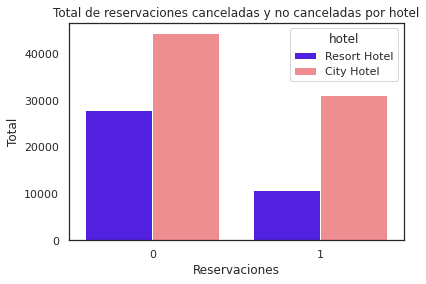

In [ ]:
ax = sns.countplot(x="is_canceled", hue="hotel", data=df_hotel, palette="gnuplot2")
ax.set_title("Total de reservaciones canceladas y no canceladas por hotel", y=1)
ax.set(xlabel="Reservaciones")
ax.set(ylabel="Total");

La mayoría de las reservaciones que fueron canceladas fueron en los hoteles de ciudad.

> ¿Cuál es la densidad de precio por noche en reservaciones no canceladas y canceladas?

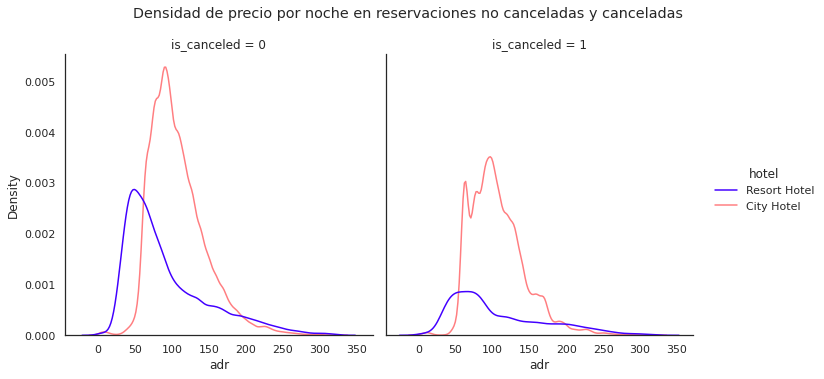

In [ ]:
ax= sns.displot(data=df_hotel, x='adr', hue='hotel', kind='kde', palette="gnuplot2", col="is_canceled")
ax.fig.suptitle('Densidad de precio por noche en reservaciones no canceladas y canceladas', y= 1.05);

> ¿Cuál es el año con mayor numero de reservaciones canceladas y en el que menos se cancelaron?

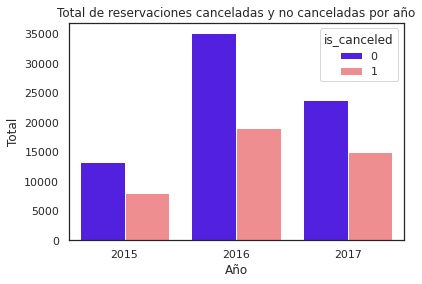

In [ ]:
ax = sns.countplot(x="arrival_date_year", hue="is_canceled", data=df_hotel, palette="gnuplot2")
ax.set_title("Total de reservaciones canceladas y no canceladas por año", y=1)
ax.set(xlabel="Año")
ax.set(ylabel="Total");

El 2016 fue el año en el que se realizó el mayor número de reservaciones y el comportamiento fue el mismo para las reservaciones no canceladas y canceladas

> ¿Cuál mes tuvo el mayor número de reservaciones canceladas?

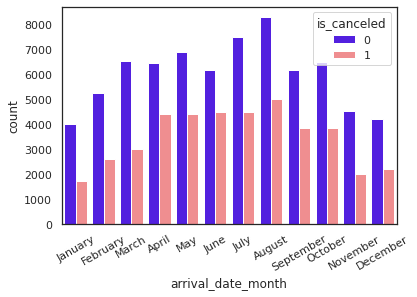

In [ ]:
ax = sns.countplot(x="arrival_date_month", hue="is_canceled", data=df_hotel_month, palette="gnuplot2")
ax = plt.xticks(rotation=30);


El mes con mayor número de reservaciones no canceladas es agosto

In [ ]:
#Extraemos la información en una crosstab
df_canceled_cross = pd.crosstab(df_hotel_month["is_canceled"], df_hotel_month["arrival_date_month"])
df_canceled_cross

arrival_date_month  January  February  March  April   May  June  July  August  \
is_canceled                                                                     
0                      4005      5244   6504   6448  6869  6164  7481    8287   
1                      1727      2608   2991   4408  4417  4472  4467    4986   

arrival_date_month  September  October  November  December  
is_canceled                                                 
0                        6147     6471      4531      4196  
1                        3826     3859      1993      2193

> ¿Cuál es la densidad del tiempo de espera?

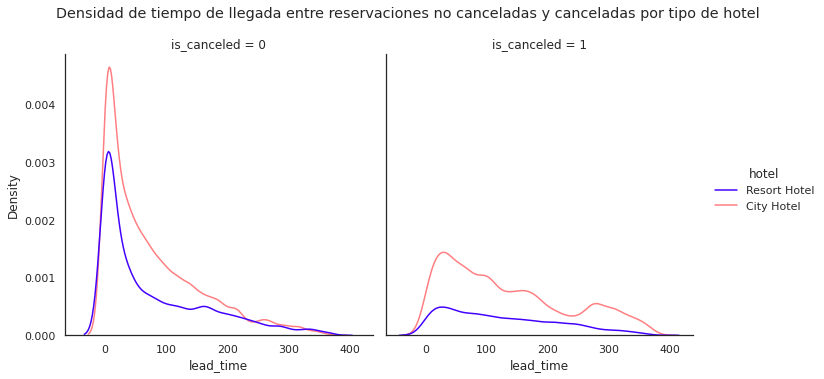

In [ ]:
ax= sns.displot(data=df_hotel, x='lead_time', hue='hotel', kind='kde', col="is_canceled", palette="gnuplot2")
ax.fig.suptitle('Densidad de tiempo de llegada entre reservaciones no canceladas y canceladas por tipo de hotel', y= 1.05);

Vemos que para las reservaciones no canceladas existe una mayor concentración en la variables con poco tiempo de espera (desde que se hace la reservación hasta que llega al hotel)

> Reservaciones canceladas y no canceledas por canal de distribución

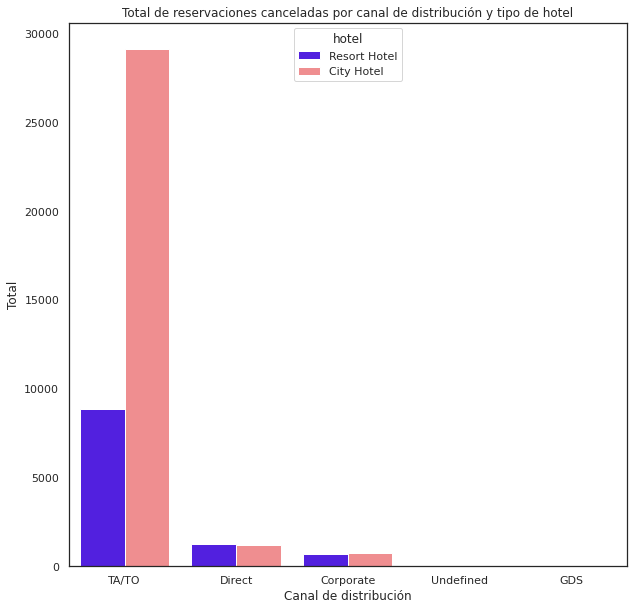

In [ ]:
plt.figure(figsize=(10,10))

ax = sns.countplot(x="distribution_channel", hue="hotel", data=df_canceled, palette="gnuplot2")
ax.set_title("Total de reservaciones canceladas por canal de distribución y tipo de hotel", y=1)
ax.set(xlabel="Canal de distribución")
ax.set(ylabel="Total");

TA/TO que son las agencias de viajes y los operadores turísticos tienen el mayor número de reservaciones y por lo tanto también de las que fueron canceladas.

> ¿Cuál es el porcentaje de cancelación que tiene cada canal de distribución?

In [ ]:
#Primero del dataset de reservaciones canceladas, agrupamos por canal.
canceled = df_canceled.groupby("distribution_channel")
canceled = pd.DataFrame(canceled.size()).rename(columns = {0:"total_canceled"})
canceled

total_canceled
distribution_channel                
Corporate                       1436
Direct                          2429
GDS                               37
TA/TO                          38041
Undefined                          4

In [ ]:
#Identificamos el total de reservaciones que tuvo cada canal
total_hotel_2 = df_hotel.groupby("distribution_channel").size()
total_hotel_2 = pd.DataFrame(total_hotel_2).rename(columns = {0:"total_reservations"})
total_hotel_2

total_reservations
distribution_channel                    
Corporate                           6408
Direct                             13770
GDS                                  189
TA/TO                              93922
Undefined                              5

In [ ]:
#Unimos las tablas anteriores
cancelaciones_total = pd.concat([canceled, total_hotel_2], axis=1)
cancelaciones_total

total_canceled  total_reservations
distribution_channel                                    
Corporate                       1436                6408
Direct                          2429               13770
GDS                               37                 189
TA/TO                          38041               93922
Undefined                          4                   5

In [ ]:
#Agregamos la columna en que se calcula el porcentaje de cada uno de los canales que es cancelado
cancelaciones_total["canceled_%"] = cancelaciones_total["total_canceled"]/cancelaciones_total["total_reservations"]*100
cancelaciones_total

total_canceled  total_reservations  canceled_%
distribution_channel                                                
Corporate                       1436                6408   22.409488
Direct                          2429               13770   17.639797
GDS                               37                 189   19.576720
TA/TO                          38041               93922   40.502758
Undefined                          4                   5   80.000000

''

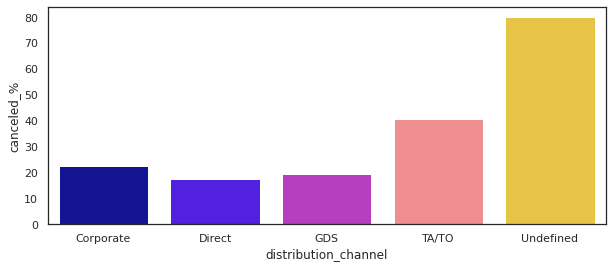

In [ ]:
#Presetamos la gráfica de barras
plt.figure(figsize=(10,4))
ax= sns.barplot(x=cancelaciones_total.index, y = cancelaciones_total["canceled_%"], palette="gnuplot2")
;

El canal que canceló la mayoría de sus reservaciones realizadas en el mismo fueron los no definidos. En esa categoría solo se realizaron 5 reservaciones pero el 80% fue cancelado. 

Mientras que los que realizaron las reservaciones directamente con el hotel, solo el 17% realizó una cancelación.

> Distribución del precio por noche por tipo de hotel de las reservaciones canceladas y no canceladas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



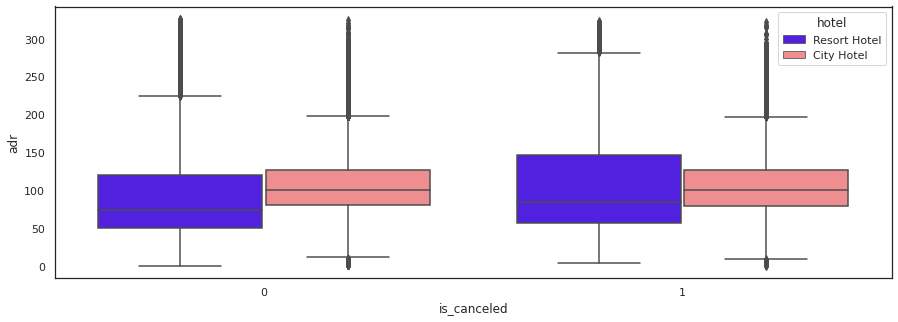

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(df_hotel["is_canceled"], df_hotel["adr"], hue= df_hotel["hotel"], palette="gnuplot2")
ax.set_title("Precio promedio por noche de habitación", y=1)
ax.set(xlabel="No cancelada y canceladas")
ax.set(ylabel="Precio promedio");

In [ ]:
print(f'El precio promedio de las habitaciones que cancelan su reservación es de {round(df_canceled["adr"].mean())} y de las que no cancelan su reservación es de {round(df_no_canceled["adr"].mean())}');

El precio promedio de las habitaciones que cancelan su reservación es de 107 y de las que no cancelan su reservación es de 102


### Correlación y visualización de datos avanzada

Hasta el momento hemos obtenido hallazgos sobre los hoteles tipo resort y de ciudad así como de sus reservaciones. Sin embargo, es necesario conocer si existe correlación entre sus variables para definir el modelo de clasificación a utilizar.


In [ ]:
#Quitar las variables
#df_filtrado = df_hotel.drop(columns= ["children", "babies"])

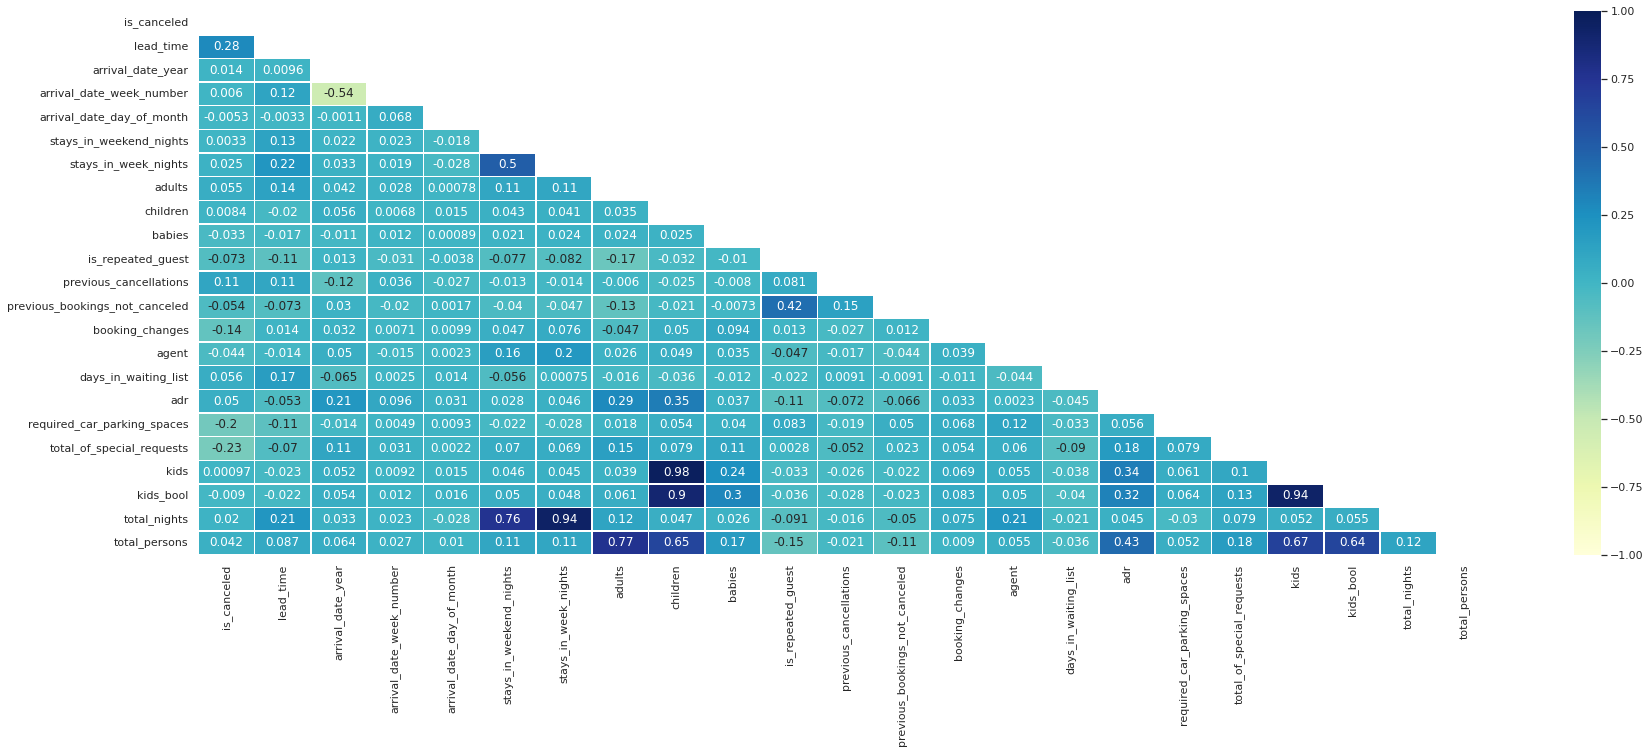

In [ ]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(29, 10))
  ax = sns.heatmap(df_hotel.corr(), mask = mask ,vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)


Al presentar las correlaciones entre varialbes, nos damos cuenta que no son muy altas entre si. Se destacan las siguientes:


*   lead_time - is_canceled (tiempo de espera y que se cancele o no una reservación)
*   total_nights - agent (números de noches de la resevación con el agente que la realizó)
*   total_persons - adr precio promedio por noche (total de personas por reservación con el precio por noche)



Ahora lo contrastamos con un heatmap eliminando las variables creadas

In [ ]:
#Se descartan las variables creadas
df_filtro = df_hotel.drop(columns=["children", "babies", "stays_in_weekend_nights", "stays_in_week_nights", "kids_bool", "adults"])

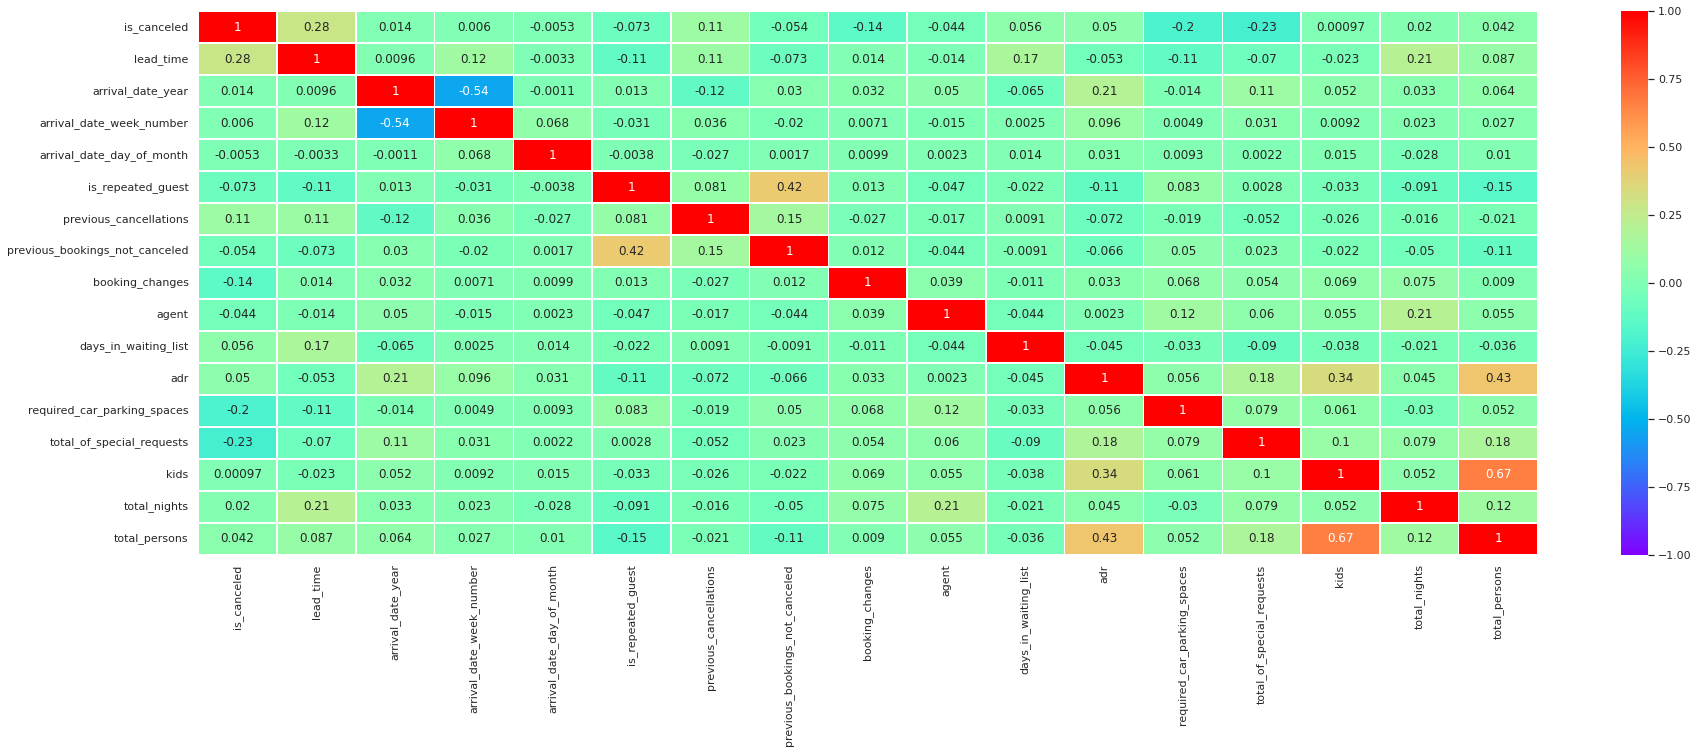

In [ ]:
#Presentamos la información
plt.figure(figsize=(30,10))
sns.heatmap(df_filtro.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, cmap="rainbow");

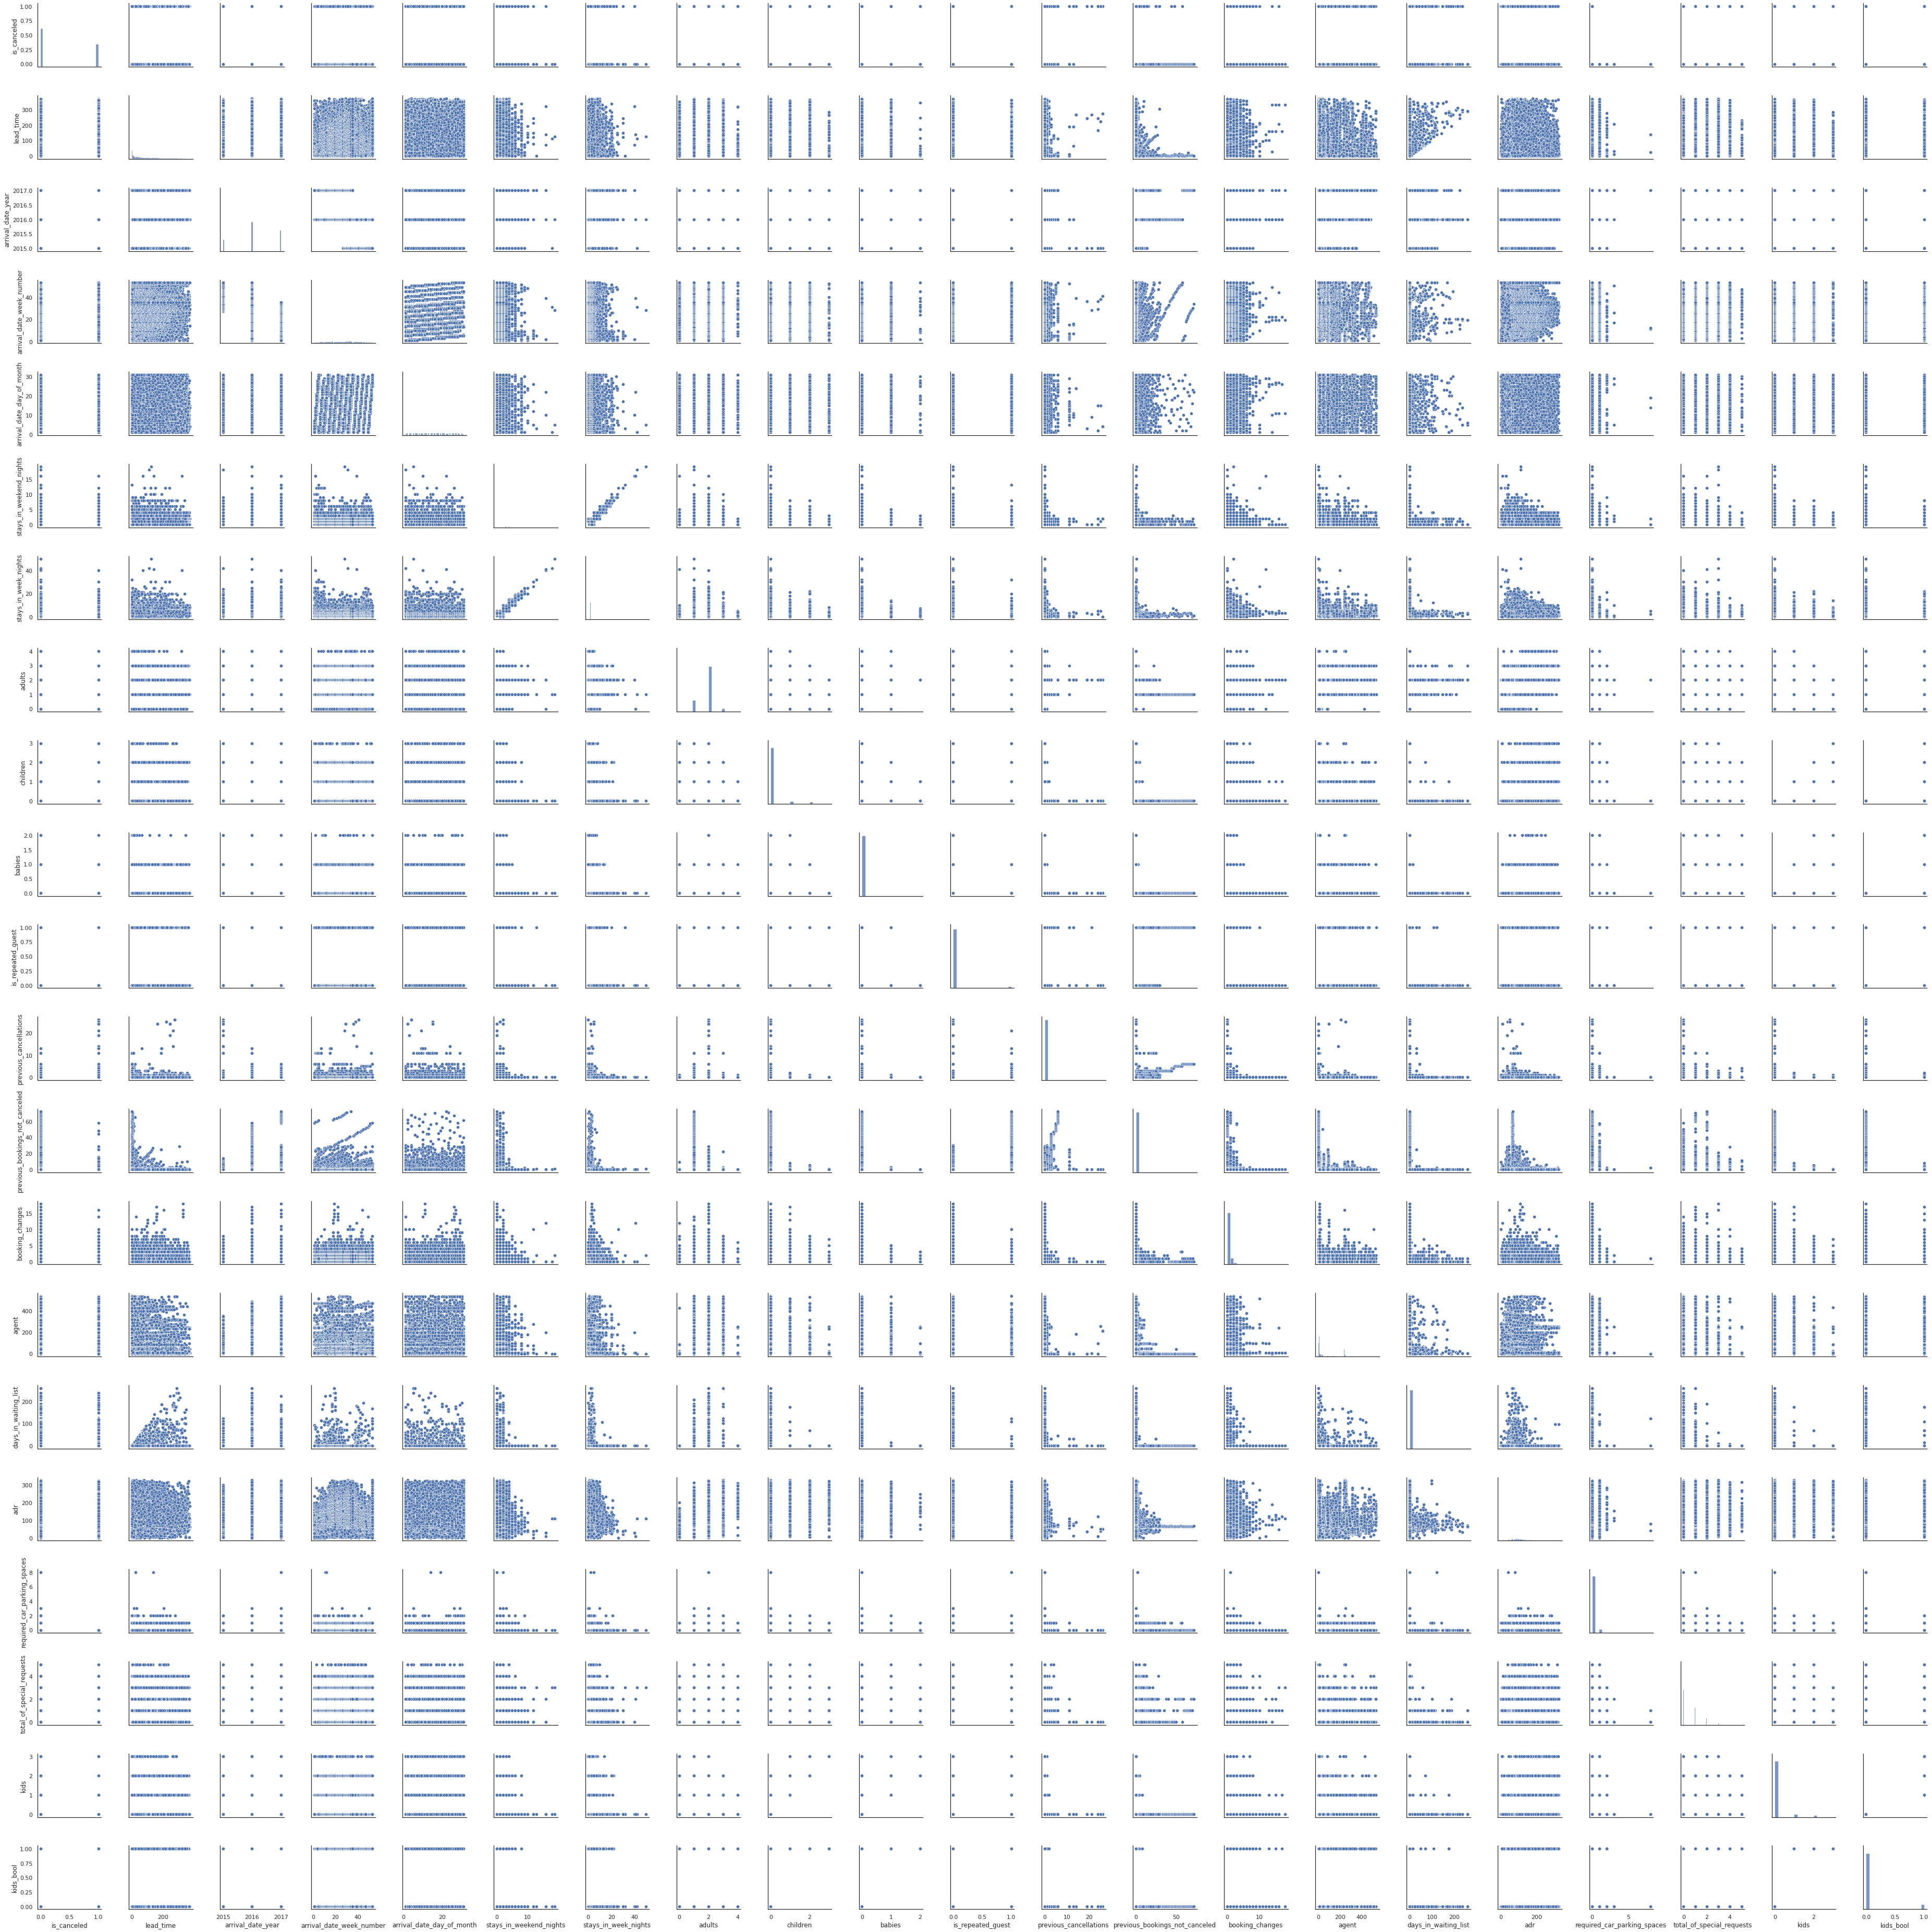

In [ ]:
#Mostramos los plots de cada uno de los cruces de variables
#sns.pairplot(df_hotel)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



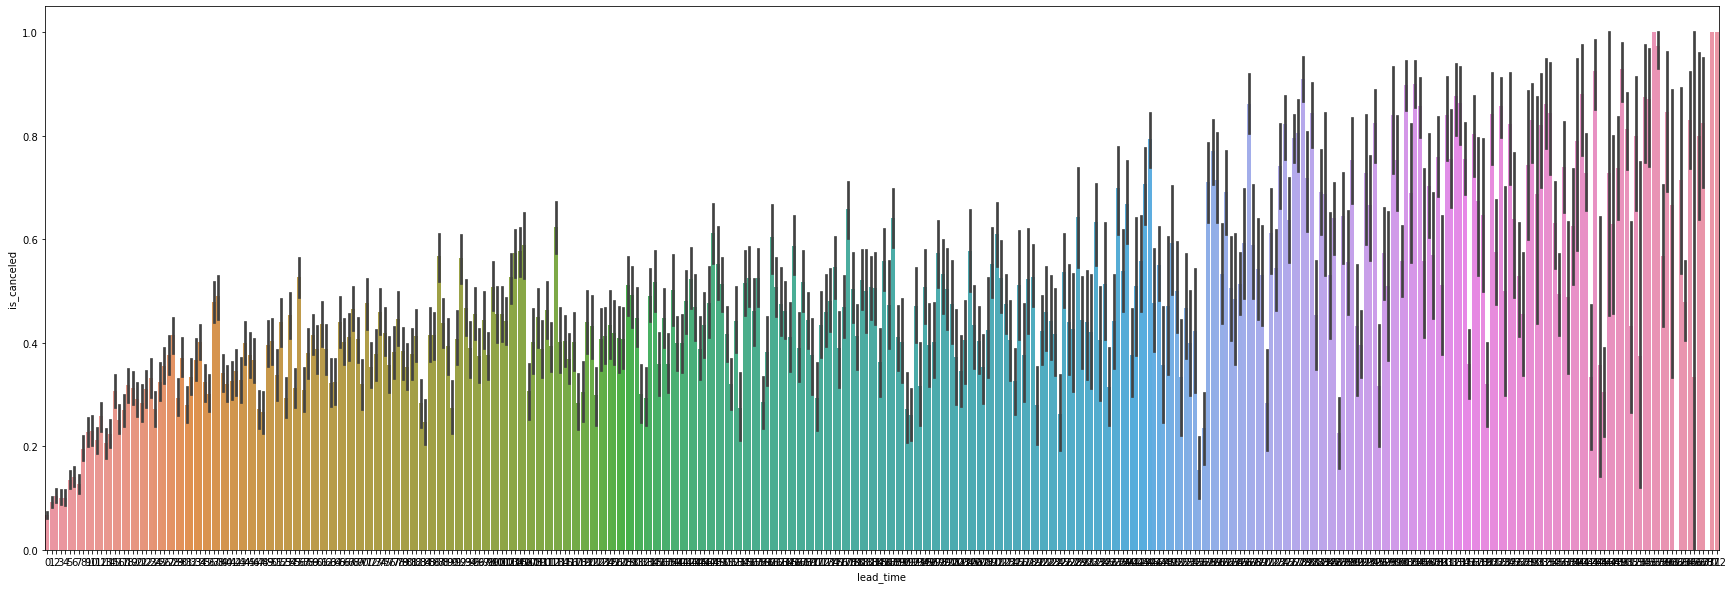

In [ ]:
from numpy import mean
plt.figure(figsize=(30,10))
sns.barplot(df_hotel["lead_time"], df_hotel["is_canceled"], estimator=mean);

Interesa al proyecto conocer la relación de la variable de cancelaciones con el resto del dataset, por lo que separamos su correlación.

In [ ]:
#Ordenamos la correlación de mayor a menor
corre_df= df_hotel.corr()[["is_canceled"]].sort_values(by="is_canceled", ascending=False)

Text(0.5, 1.0, 'Correlación con la cancelación de la reservación')

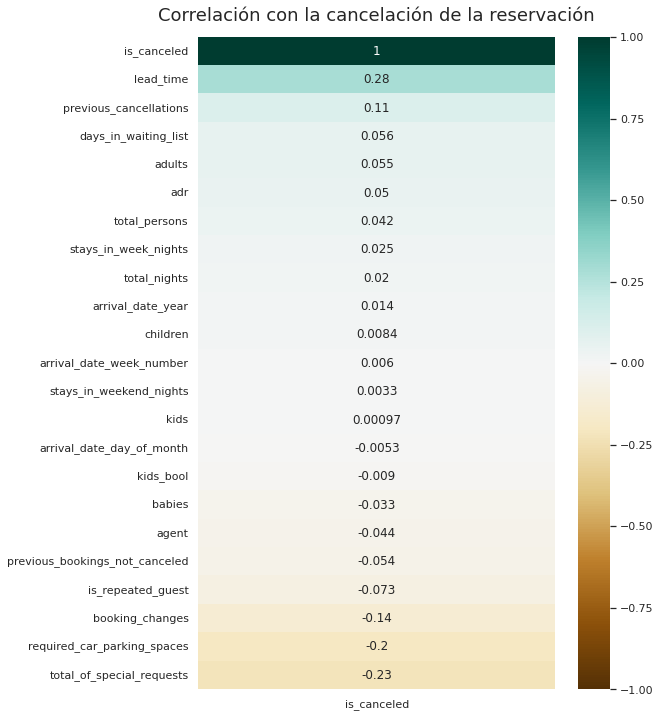

In [ ]:
#Presentamos la información
from seaborn.matrix import heatmap
from IPython.core.pylabtools import figsize
plt.figure(figsize=(8,12))

heatmap = sns.heatmap(df_hotel.corr()[["is_canceled"]].sort_values(by="is_canceled", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title('Correlación con la cancelación de la reservación', fontdict={'fontsize':18}, pad=16)

Las tres variables con mayor correlación positiva con la cancelación de una reservación son:

1.    lead_time (tiempo de espera)
2.  previous_cancelations (si ha hecho cancelaciones previamente)
3.  days_in_waiting_list (días en la lista de espera previa a la confirmación de su reservación)

Las tres variables con la mayor correlación negativa son:
1.  total_of_special_requests (total de requerimientos especiales)
2.  required_car_parking_spaces (número de cajones de estacionamiento requeridos)
3.  booking_changes (cambios en la reservación)


En la siguiente sección del trabajo se elaboraron modelos con la finalidad de predecir la cancelación de una reservación.

> Ejemplos de correlación

A continuación se muestra algunas relaciones de correlación entre variables que salieron con mayor valor en el heatmap



*   Correlación entre tiempo de espera y estancia entre semana


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



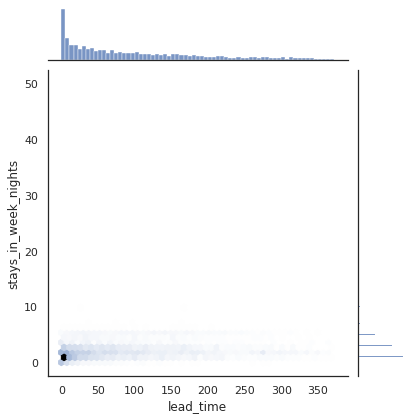

In [ ]:
sns.jointplot('lead_time', 'stays_in_week_nights', data=df_hotel, kind='hex', ratio=5, joint_kws={'gridsize': 50});




*   Correlación entre adultos y precio promedio por noche


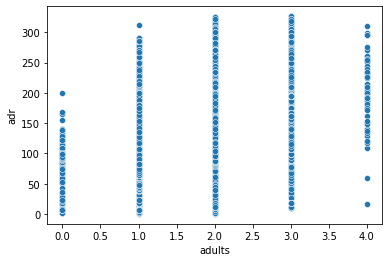

In [ ]:
sns.scatterplot(x=df_hotel['adults'], y=df_hotel['adr']);

In [ ]:
df_hotel['adr'].corr(df_hotel['adults'])

0.288278179422714

*     Correlación entres agente y número total de noches

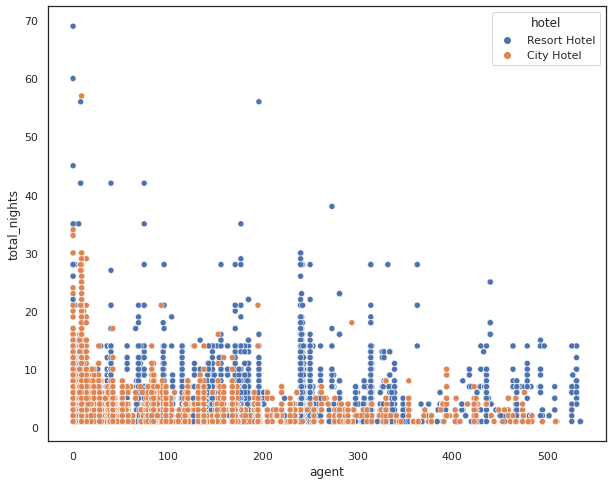

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_hotel['agent'], y=df_hotel['total_nights'], hue=df_hotel["hotel"]);

In [ ]:
df_hotel['agent'].corr(df_hotel['total_nights'])

0.21242644489468826

*    Correlación entre total de noches y precio promedio por noche

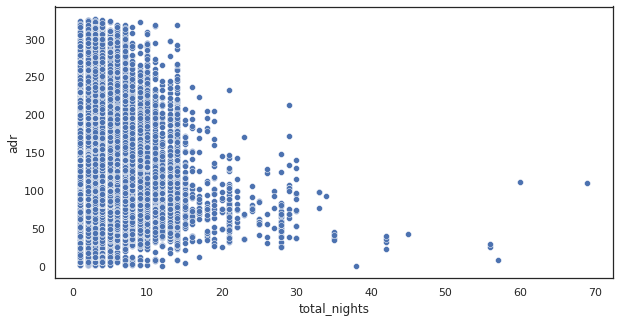

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=df_hotel['total_nights'], y=df_hotel['adr']);

In [ ]:
df_hotel['total_nights'].corr(df_hotel['adr'])

0.04518358754085582

### Dataset de entrenamiento, prueba y preprocessing

Elaborar un modelo para la predicción de la cancelación de las reservaciones implica preparar los datos. El primer paso es tener seccionado nuestro dataset en la variable dependiente(s) (en este caso la cancelación de las reservaciones) y la(s) indipendiente(s) (el resto tomadas de la base de datos)

Una vez identificadas es necesario para codificación de modelos, dividir nuestro dataset en dos bloques: uno de entrenamieto y otro de prueba. Con ellos podemos realizar el entrenamiento de nuestro modelo y su ejecución.

Ya que tenemos segmentado nuestro dataset, el siguiente paso es tranformarlos para que puedan ser utilizados por los modelos. En otras palabras, nuestros datos se conforma de variables categóricas y numéricas por lo que es necesario realizar *preprocessing* para obtener mejores resultados al momento de implementar modelos.

En este caso se optó por utilizar *sklear* y *pipline* ya que las variables numéricas serán tranformadas con *StandarScalar* y las categorícas con *OneHotEncoder*

*Standar scalar* estandirza los datos al eliminar la media y llevar la varianza a uno; mientras que *One hot encoding* transforma los valores de varias columnas en rangos de 0 a 1.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.compose import ColumnTransformer, make_column_transformer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
#Eliminar las variables que no aportan a nuestra variable a predecir (de acuerdo a la tabla de correlación)
df_proces = df_hotel.drop(["arrival_date", 'assigned_room_type', 'booking_changes', 'arrival_date_year', "reservation_status_date", "reservation_status", 'country', 'agent', "days_in_waiting_list", 'kids',
 'kids_bool',
 'total_nights',
 'total_persons', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis=1) #'babies', 'children', 'kids_bool'

In [ ]:
#Identificamos nuestra variable independientes y dependientes
X = df_proces.drop(["is_canceled"], axis = 1)
y = df_proces["is_canceled"]

In [ ]:
#se divide en training y testing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Pipeline
#Es necesario identificar las variables numéricas
num_cols = [col for col in X_train.columns if X_train[col].dtypes!='O']
num_cols

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
#Indentificamos las varibles categóricas
cat_cols = [col for col in X_train.columns if X_train[col].dtypes=='O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

In [ ]:
# pipeline para aplicar standarscaler a las variables numéricas
num_transformer = make_pipeline(StandardScaler(),
                                    SimpleImputer(strategy='constant'))

In [ ]:
# pipeline para aplicar onehotencoder en variables categóricas
cat_transformer = make_pipeline(SimpleImputer(strategy='constant'),
                                    OneHotEncoder(sparse=False, handle_unknown='ignore'))

In [ ]:
#Pipeline completo
column_transformer = make_column_transformer((num_transformer, num_cols),
                                                   (cat_transformer, cat_cols))

In [ ]:
#Lo aplicamos a nuestro dataset de training y lo tranformamos en dataframe, lo mismo haremos con test
X_train = pd.DataFrame(column_transformer.fit_transform(X_train))
X_train

0         1         2         3         4         5         6   \
0      0.028597  0.053184 -0.805862  0.290740 -0.264054 -0.087693 -0.172428   
1     -0.706563  1.055628  1.289651 -1.772259 -0.264054 -0.087693 -0.172428   
2     -1.041709  0.053184 -0.805862  0.290740 -0.264054 -0.087693 -0.172428   
3      1.390805 -0.949261  0.241895  0.290740 -0.264054 -0.087693 -0.172428   
4     -0.847108 -0.949261 -0.281984  0.290740 -0.264054 -0.087693 -0.172428   
...         ...       ...       ...       ...       ...       ...       ...   
91430 -0.717374 -0.949261 -0.281984 -1.772259 -0.264054 -0.087693 -0.172428   
91431 -0.566018 -0.949261  0.241895  0.290740 -0.264054 -0.087693 -0.172428   
91432 -0.306550 -0.949261 -0.281984 -1.772259 -0.264054 -0.087693 -0.172428   
91433  0.061030 -0.949261 -0.281984 -1.772259 -0.264054 -0.087693 -0.172428   
91434  2.547600  1.055628 -0.281984  0.290740 -0.264054 -0.087693 -0.172428   

             7         8         9   ...   50   51   52   53   54   55   56  \
0     -0.101597 -0.087196  0.770281  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1     -0.101597 -0.087196 -0.576919  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2     -0.101597 -0.087196 -1.206448  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3     -0.101597 -0.087196  0.238833  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4     -0.101597 -0.087196  1.191552  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
91430 -0.101597 -0.087196 -1.703331  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
91431 -0.101597 -0.087196 -0.623151  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
91432 -0.101597 -0.087196 -1.174043  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
91433 -0.101597 -0.087196 -0.515133  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
91434 -0.101597 -0.087196  0.206427  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

        57   58   59  
0      0.0  1.0  0.0  
1      0.0  1.0  0.0  
2      0.0  0.0  1.0  
3      0.0  1.0  0.0  
4      0.0  1.0  0.0  
...    ...  ...  ...  
91430  0.0  0.0  1.0  
91431  0.0  1.0  0.0  
91432  0.0  0.0  1.0  
91433  0.0  0.0  1.0  
91434  0.0  1.0  0.0  

[91435 rows x 60 columns]

In [ ]:
X_test = pd.DataFrame(column_transformer.fit_transform(X_test))


In [ ]:
X_test

0         1         2         3         4         5         6   \
0     -0.343633  1.066342  1.309414  0.289941 -0.265003 -0.087629 -0.168349   
1      1.804751  0.060669 -0.801774  0.289941 -0.265003 -0.087629 -0.168349   
2     -0.517239  1.066342 -0.273977  0.289941 -0.265003 -0.087629 -0.168349   
3     -0.951256 -0.945005  0.253820  0.289941 -0.265003 -0.087629 -0.168349   
4     -0.853603  1.066342 -0.273977 -1.755666 -0.265003 -0.087629 -0.168349   
...         ...       ...       ...       ...       ...       ...       ...   
22854 -1.027209 -0.945005 -0.273977 -1.755666 -0.265003 -0.087629 -0.168349   
22855  0.209739 -0.945005 -0.801774  0.289941 -0.265003 -0.087629 -0.168349   
22856  2.813841 -0.945005 -0.273977  0.289941 -0.265003 -0.087629 -0.168349   
22857 -0.886154  0.060669  0.781617  0.289941 -0.265003 -0.087629 -0.168349   
22858  0.090384 -0.945005  0.253820  0.289941 -0.265003 -0.087629 -0.168349   

             7         8         9   ...   50   51   52   53   54   55   56  \
0     -0.105019  0.700734 -0.520664  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1      1.221293 -0.091730 -0.904170  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
2     -0.105019 -0.091730 -0.225493  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3     -0.105019 -0.091730  1.602194  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4     -0.105019 -0.091730  1.422721  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
22854 -0.105019 -0.091730 -1.054987  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
22855 -0.105019 -0.091730  0.086913  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
22856  1.221293 -0.091730 -0.904170  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
22857 -0.105019 -0.091730  0.004395  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
22858 -0.105019 -0.091730  0.086913  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

        57   58   59  
0      0.0  1.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  1.0  
3      0.0  1.0  0.0  
4      0.0  0.0  1.0  
...    ...  ...  ...  
22854  0.0  0.0  1.0  
22855  0.0  1.0  0.0  
22856  0.0  0.0  1.0  
22857  0.0  1.0  0.0  
22858  0.0  1.0  0.0  

[22859 rows x 60 columns]

In [ ]:
#En caso de que falten datos con el siguiente for se llenan los valores faltantes
#for i in X_train.columns:
#     if i not in X_test.columns: X_test[i] = 0
#print("Checking the no. of columns in test dataset")

#X_test.head()

In [ ]:
X_test = X_test.reindex(X_train.columns, axis=1)

### Modelos

Un modelo es la representación simplicada de la realidad que se elabora para resolver un problema. Su importancia radica en que contribuyen a seleccionar las variables *más importantes* y que mayor información dan sobre nuestro problema.

Para nuestro objetivo, que es la predicción de las cancelaciones de las reservaciones es preferible utilizar modelos de clasificación (en lugar de regresión) ya que se pretende obtener datos de si o no; en lugar de un dato numérico.

Por lo tanto se utiliza la regresión lineal con fines académicos sumado a sus cualidades que se explican en su apartado.

A la par se desarrolló un modelo SVM (de clasificiación).

Por último se presenta KMean para explorar posibles clusters con las variables más representativas.

#### Regresión logística

La regresión logística es un modelo que da estimadores numéricos y su objetivo son las variables catégoricas. En nuestro caso nos interesa conocer si se cancelará o no una reservación, es decir, la probalidad de que se una u otra categoría. Por lo tanto, utilizar una regresión lineal es viable ya que predice el resgistro de probabilidades de clasificación.

La regresión logística se considera más un modelo de estimación de probabilidad que de regresión pese a su nombre.

Ahora es momento de ejecutarla:

In [ ]:
#Modelo de regresión logística
logreg = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [ ]:
#training del modelo
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
#predicción
y_pred = logreg.predict(X_test)

In [ ]:
#Valor de la regresión logística
logreg.score(X_test, y_test)

0.8036222056957872

El modelo alcanza un 80% de accuracy. 

Se complementa su interpretación con una matriz de confusión, curva ROC/AUC y validación cruzada.

##### Matriz de confusión

La matriz de confusión nos permite visualizar como el modelo ajusta los siguientes parámetros basándose en el aprendizaje automático, obtenemos los siguientes indicadores:

1. Precisión: que tan cerca esta el resultado de una predicción del valor verdadero.
2. Exactitud: Porcentaje de predicciones correctas del total realizadas.
3. Sensibilidad: Es la tasa de verdaderos positivos, es decir, la proporción de casos positivos bien clasificados por el modelo respecto al total.
4. Especificidad: Tasa de verdaderos negativos; la proporción de negativos bien clasificados por el modelo.


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[13541,   873],
       [ 3616,  4829]])

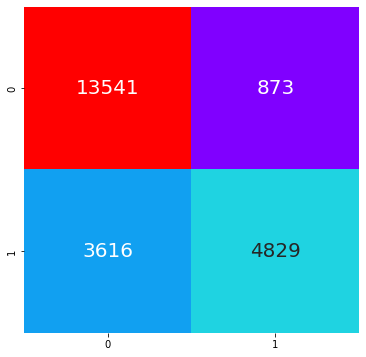

In [ ]:
class_names=[0, 1]
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='rainbow', annot_kws={"size": 20}, fmt="g", cbar=False);

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.8468958260259558
Exactitud: 0.8036222056957872
Sensibilidad: 0.5718176435760806
Especificidad: 0.939433883724157


La principal deficiencia del modelo es la sensibilidad, es decir que varios datos positivos no los clasifica adecuadamente, siendo algo perjudicial para nuestro modelo ya que nos interesa detectar esas cancelaciones para disminuir el valor perdido.

In [ ]:
print(logreg.intercept_)

[-0.81339181]


In [ ]:
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.804
Test set score: 0.804


##### Curva ROC/AUC regresión logística

Con este método de evaluación analizamos la proporción de verdaderos positivos (sensibilidad) y falsos positivos. Para realizarlo debemos primero calcular una predicción de probabilidades

In [ ]:
#obtenemos el array de prediccciones con valores probabilísiticos para que sea 0, 1.
y_pred_proba = logreg.predict_proba(X_test)

In [ ]:
#visualizamos algunos datos del array
y_pred_proba[:10,:]

array([[1.00000000e+00, 1.66318656e-13],
       [1.09626504e-01, 8.90373496e-01],
       [8.88012182e-01, 1.11987818e-01],
       [9.27421921e-01, 7.25780794e-02],
       [7.79201885e-01, 2.20798115e-01],
       [1.21501652e-02, 9.87849835e-01],
       [6.64745638e-01, 3.35254362e-01],
       [5.23105105e-01, 4.76894895e-01],
       [4.62967108e-01, 5.37032892e-01],
       [6.30273291e-01, 3.69726709e-01]])

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
#Funcion de ROC/AUC. La relación de verdaderos y falsos positivos
#No se requiere saber los límites (_)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1]) #utilizamos la probabilidad de que sea 1
roc_auc = auc(fpr, tpr)

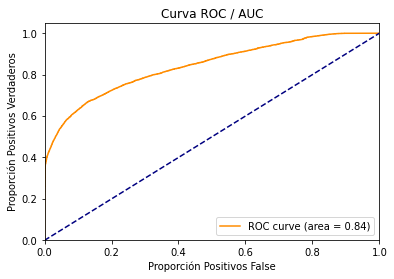

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') #línea de separación
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

El modelo de regresión logística tiene una sensibilidad cercana a 0.6 para clasificar los positivos verdaderos.

##### Validación cruzada del modelo de regresión logística

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
X_validar = pd.DataFrame(column_transformer.fit_transform(X))

In [ ]:
y_colum = pd.Series(y).to_frame()

In [ ]:
X_validar = X_validar.reindex(y_colum.columns, axis=1)

In [ ]:
scores = cross_validate(logreg, X_validar, y, scoring="r2", error_score='raise')

In [ ]:
f"Score del modelo: {scores['test_score'].mean():.3f} +/- {scores['test_score'].std():.3f}"

'Score del modelo: -0.281 +/- 0.091'

El resultado del promedio de todas las combinaciones que realizó el modelo es muy bajo.

#### SVC

Las Máquinas de Vectores de Soporte resuelve problemas de clasificación y regresión además de que es menos sensible que el anterior, por lo que es una opción para predecir la cancelación de las reservaciones.

El modelo busca el mejor valor para *gamma* y regularizar el parámetro *C*. Para optimizarlo se utiliza *GridSerachCV()* sin embargo solo se presenta con el modelo regular.

In [ ]:
model_svc = SVC()

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
pipe.get_params()

{'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()), ('svc', SVC())],
 'svc': SVC(),
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False,
 'verbose': False}

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
#Ajustar el modelo
#param_grid = [
#              { "C": [0.5, 1],
#               "gamma": ["scale", 1, 0.1],
#               "kernel": ["rbf"]}
#]

#optimal_params = GridSearchCV(
#    SVC(),
#    param_grid,
#    cv=5,
#    scoring="accuracy",
#    verbose=0
#)

#optimal_params.fit(X_train, y_train)

##### Matriz de confusión

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[13485,   929],
       [ 3289,  5156]])

In [ ]:
print("Training set score: {:.3f}".format(pipe.score(X_train,y_train)))
print("Test set score: {:.3f}".format(pipe.score(X_test,y_test)))

Training set score: 0.822
Test set score: 0.815


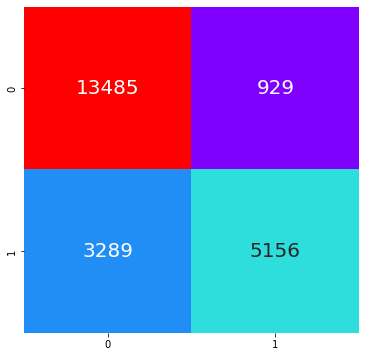

In [ ]:
class_names=[0, 1]
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='rainbow', annot_kws={"size": 20}, fmt="g", cbar=False);

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.847329498767461
Exactitud: 0.8154774924537381
Sensibilidad: 0.6105387803433985
Especificidad: 0.939433883724157


##### Validación cruzada del método SVC

In [ ]:
scores_pipe = cross_validate(pipe, X_validar, y, scoring="r2")

In [ ]:
f"Score del modelo: {scores_pipe['test_score'].mean():.3f} +/- {scores_pipe['test_score'].std():.3f}"

#### (Modelo extra no relacionado con las cancelaciones) K medias

Este modelo nos ayuda a indentificar grupos cuando el dato disponible son los números de segmentos requeridos (clusters).

Se elaboró con fines educativos los siguientes ejemplos. Para el primer caso se tiene el supuesto que se solicita clasificar a nuestros clientes en seis grupos de acuerdo al precio promedio por noche y el tiempo de espera.

In [ ]:
from sklearn.cluster import KMeans

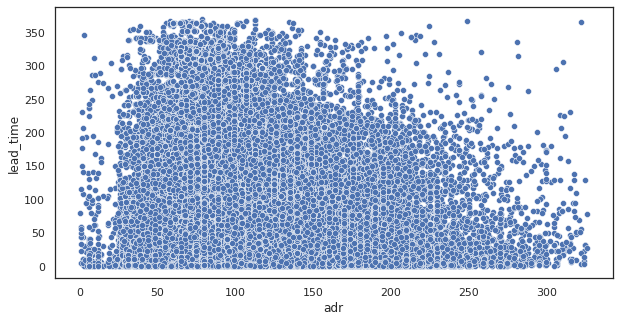

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=df_no_canceled["adr"], y=df_no_canceled['lead_time']);
#preguntar por mas variables

In [ ]:
k_means = KMeans(n_clusters=6, max_iter=10000)

In [ ]:
k_means.fit(df_no_canceled[['adr', 'lead_time']])

In [ ]:
centers = k_means.cluster_centers_

In [ ]:
clasificaciones = k_means.predict(df_no_canceled[['adr', 'lead_time']])

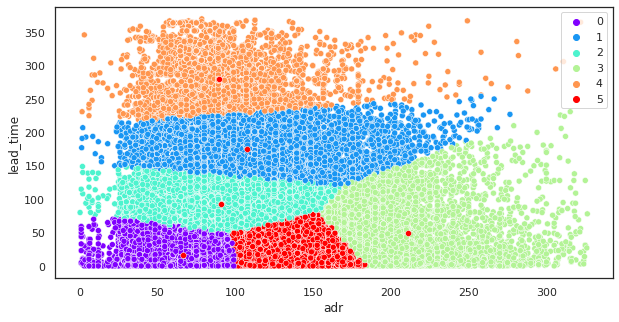

In [ ]:
#Notamos nuestros grupos identificados por color
plt.figure(figsize = (10,5))
sns.scatterplot(x=df_no_canceled["adr"], y=df_no_canceled['lead_time'], hue=clasificaciones, palette='rainbow');
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red');



*   Cluster por tiempo de espera y porcentaje de cancelación (caso práctico)





In [ ]:
uno = df_hotel.groupby("lead_time")["is_canceled"].sum()
uno = pd.DataFrame(uno).rename(columns = {"is_canceled":"total_cancelaciones"})

dos = df_hotel.groupby("lead_time").size()
dos = pd.DataFrame(dos).rename(columns = {0:"total_reservations"})


tres = pd.concat([uno, dos], axis=1)


tres["canceled_%"] = tres["total_cancelaciones"]/tres["total_reservations"]*100
tres["lead_time_total"] =tres.index
tres

total_cancelaciones  total_reservations  canceled_%  \
lead_time                                                        
0                          387                5768    6.709431   
1                          303                3283    9.229363   
2                          208                1989   10.457516   
3                          176                1740   10.114943   
4                          165                1644   10.036496   
...                        ...                 ...         ...   
367                         20                  25   80.000000   
368                         33                  40   82.500000   
370                          0                   1    0.000000   
371                          1                   1  100.000000   
372                         44                  44  100.000000   

           lead_time_total  
lead_time                   
0                        0  
1                        1  
2                        2  
3                        3  
4                        4  
...                    ...  
367                    367  
368                    368  
370                    370  
371                    371  
372                    372  

[372 rows x 4 columns]

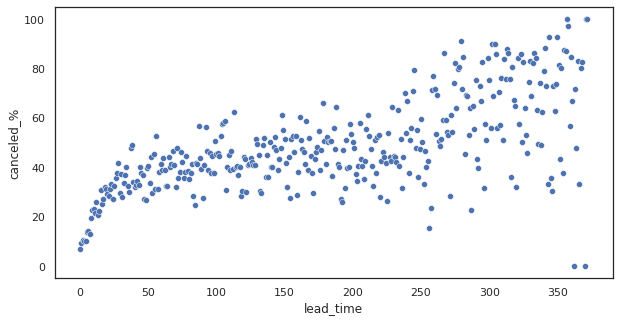

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=tres.index, y=tres['canceled_%']);

In [ ]:
tres["lead_time_total"].corr(tres['canceled_%'])

0.6612821891849077

In [ ]:
k_means = KMeans(n_clusters=6, max_iter=10000)

In [ ]:
k_means.fit(tres[['lead_time_total', 'canceled_%']])

KMeans(max_iter=10000, n_clusters=6)

In [ ]:
centers = k_means.cluster_centers_

centers

array([[ 32.        ,  30.706008  ],
       [287.        ,  65.1291715 ],
       [165.        ,  45.39887397],
       [344.05454545,  67.22411689],
       [ 99.        ,  41.71619831],
       [227.        ,  46.54908913]])

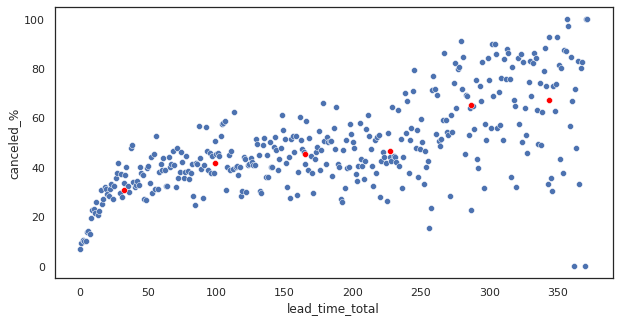

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=tres["lead_time_total"], y=tres['canceled_%']);
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red');

In [ ]:
clasificaciones = k_means.predict(tres[['lead_time_total', 'canceled_%']])



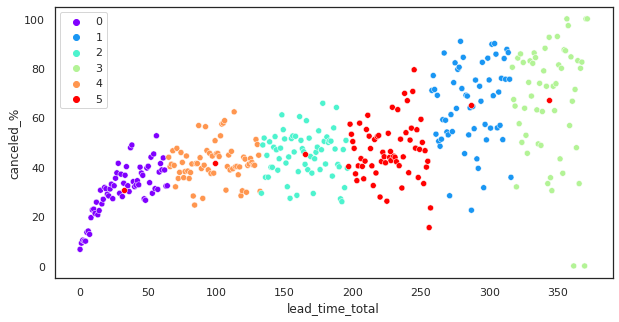

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=tres["lead_time_total"], y=tres['canceled_%'], hue=clasificaciones, palette='rainbow');
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red');



*   Cluster: Precio promedio por noche y total de noches reservadas



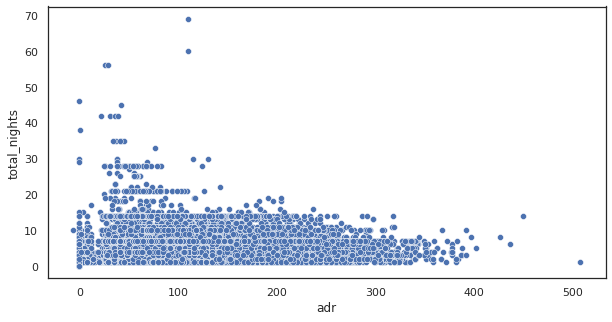

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=df_resort["adr"], y=df_resort['total_nights'], palette='rainbow');


In [ ]:
k_means = KMeans(n_clusters=4, max_iter=10000)

In [ ]:
k_means.fit(df_resort[['adr', 'total_nights']])

KMeans(max_iter=10000, n_clusters=4)

In [ ]:
centers = k_means.cluster_centers_

In [ ]:
clasificaciones = k_means.predict(df_resort[['adr', 'total_nights']])

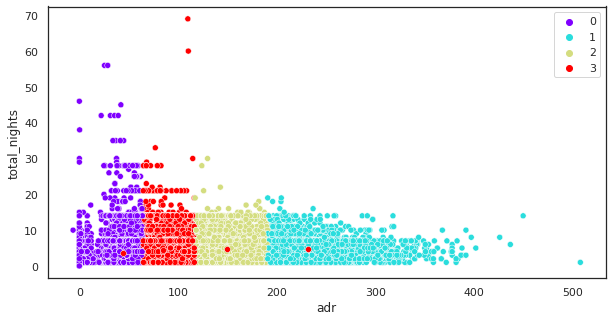

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=df_resort["adr"], y=df_resort['total_nights'], hue=clasificaciones, palette='rainbow');
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red');

### Conclusiones


**Sobre el proyecto y modelos**

El modelo de regresión logística tiene una precisión del 84% sin embargo una sensiblidad del 57% lo que origina que muchos datos verdaderos (que son cancelaciones) no las clasifique de manera adecuada,situación perjudicial para la industria.

Por otro lado la Maquina de Vectores de Soporte tienen una precisión también del 84% y una sensibilidad ligeramente mayor (del 61%). 

Comparando las matrices de confusión el modelo que mejor clasificó fue el de SVM sin embargo se sugiera realizar ajustes en los parámetros y realizar mas comprobaciones e incluso probar con un tercer modelo en el siguiente módulo.

**Sobre la práctica de preprocessing y la aplicación de modelos**

Dentro de las pruebas realizadas para llegar a los resultados, se incurrió en un error dentro de *preprocessing* ya que:
1. En primera instancia se utilizó *LabelEncoder* para transformar los valores en rangos de 0 a 1. Sin embargo se había omitido que dicha función solo se recomienda utilizar en *y*. 
2. El segundo error fue aplicarlo a todo el dataset. Se recomienda primero hacer *training test split* y sobre ello realizar *preprocessing* ajustando las diferentes funciones a los requerimientos específicos de cada tipo de variable (como se hizo en el trabajo dentro de la sección correspondiente)
3.  Después se incurrió en el sesgo de implentar con esos cambios los modelos, lo que originó valores muy favorables dentro de la matriz de confusión además de mas de un 95% de precisión, exactitud, sensibilidad y especificidad.
4.   Estos sesgos permiten que modelos no adecuados se tomen por válidos.

## Fuentes

*  (Gónzalez, 2019) http://www.scielo.org.bo/scielo.php?script=sci_arttext&pid=S2521-27372019000100005

* https://www.icex.es/icex/es/navegacion-principal/todos-nuestros-servicios/informacion-de-mercados/sectores/servicios/documentos/DOC2019825728.html

* (Nuno, 2019) https://www.sciencedirect.com/science/article/pii/S2352340918315191#tbl1fna
* https://www.cushmanwakefield.com/en/portugal/insights/hotels-business-portugal